# Cryptocurrency Price Prediction with Machine Learning

In [13]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement fbprophet>=1.1 (from versions: 0.1.post1, 0.1.1, 0.2, 0.2.1, 0.3.post1, 0.3.post2, 0.4, 0.4.post1, 0.4.post2, 0.5, 0.6, 0.7, 0.7.1)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\davat\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for fbprophet>=1.1


In [2]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/13.3 MB 5.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/13.3 MB 5.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.9/13.3 MB 5.7 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 5.7 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.8/13.3 MB 5.1 MB/s eta 0:00:02
   ------------------------ --------------- 8.1/13.3 MB 5.3 MB/s eta 0:00:01
   -------------------------- ------------- 8.9/13.3 MB 5.3 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 5.1 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 5.0 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\davat\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [3]:
from prophet import Prophet

In [7]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=768)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD',
                   start=start_date,
                   end=end_date,
                   auto_adjust=False,
                   progress=False)

data["Date"] = data.index

# Use these columns if auto_adjust=True (default for recent yfinance)
needed_columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
data = data[needed_columns]
data.reset_index(drop=True, inplace=True)


In [8]:
print(data.head())

Price        Date          Open          High           Low         Close  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
0      2023-08-27  26008.242188  26165.373047  25965.097656  26089.693359   
1      2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391   
2      2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578   
3      2023-08-30  27726.083984  27760.160156  27069.207031  27297.265625   
4      2023-08-31  27301.929688  27456.078125  25752.929688  25931.472656   

Price        Volume  
Ticker      BTC-USD  
0        6913768611  
1       11002805166  
2       29368391712  
3       16343655235  
4       20181001451  


In [5]:
print(data.tail())

          Date          Open          High           Low         Close  \
762 2023-04-07  28038.966797  28111.593750  27794.031250  27925.859375   
763 2023-04-08  27920.513672  28159.863281  27883.386719  27947.794922   
764 2023-04-09  27952.367188  28532.830078  27828.480469  28333.050781   
765 2023-04-10  28336.027344  29771.464844  28189.271484  29652.980469   
766 2023-04-11  29653.679688  30509.083984  29609.300781  30235.058594   

        Adj Close       Volume  
762  27925.859375  10861680497  
763  27947.794922   9373255556  
764  28333.050781  12175322951  
765  29652.980469  19282400094  
766  30235.058594  20121259843  


In [9]:
data.shape

(767, 6)

In [11]:
print(data.info())          # Check for NaN and data types
print(data.head(20))        # See sample values
print(data.shape)           # Should show number of rows > 0
print(data.isnull().sum())  # Check for missing data per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           767 non-null    datetime64[ns]
 1   (Open, BTC-USD)    767 non-null    float64       
 2   (High, BTC-USD)    767 non-null    float64       
 3   (Low, BTC-USD)     767 non-null    float64       
 4   (Close, BTC-USD)   767 non-null    float64       
 5   (Volume, BTC-USD)  767 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 36.1 KB
None
Price        Date          Open          High           Low         Close  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
0      2023-08-27  26008.242188  26165.373047  25965.097656  26089.693359   
1      2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391   
2      2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578

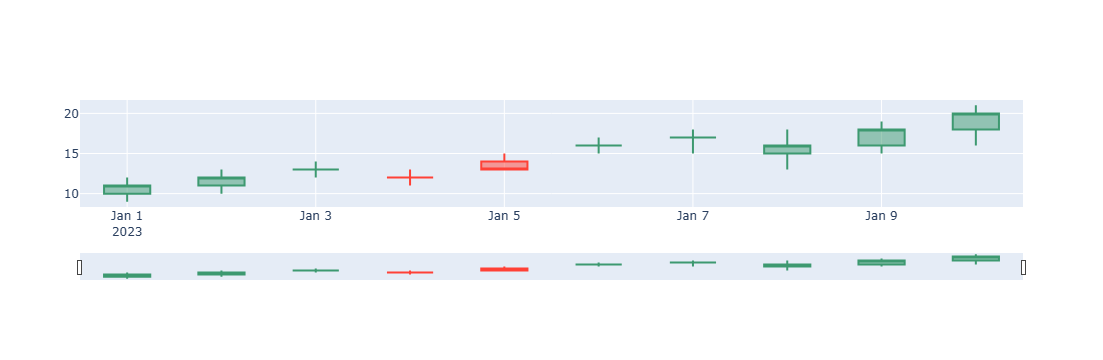

In [12]:
import pandas as pd
import plotly.graph_objects as go

# Example data
df = pd.DataFrame({
    "Date": pd.date_range("2023-01-01", periods=10),
    "Open": [10,11,13,12,14,16,17,15,16,18],
    "High": [12,13,14,13,15,17,18,18,19,21],
    "Low": [9,10,12,11,13,15,15,13,15,16],
    "Close": [11,12,13,12,13,16,17,16,18,20]
})
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], 
                                        high=df["High"],
                                        low=df["Low"], 
                                        close=df["Close"])])
figure.show()


In [17]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

In [14]:
print(data.columns.tolist())

['Date_', 'Open_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Close_BTC-USD', 'Volume_BTC-USD']


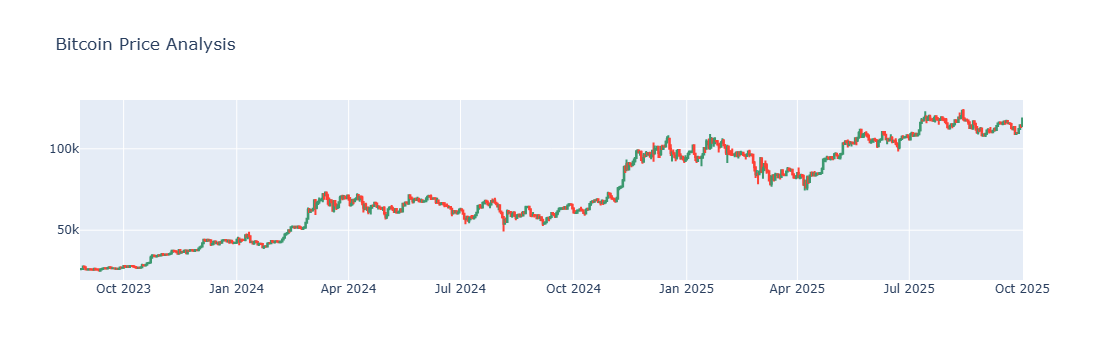

In [16]:
figure = go.Figure(data=[go.Candlestick(
    x=data["Date_"],          # <-- use the real column name found above
    open=data["Open_BTC-USD"],
    high=data["High_BTC-USD"],
    low=data["Low_BTC-USD"],
    close=data["Close_BTC-USD"]
)])
figure.update_layout(title = "Bitcoin Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [19]:
correlation = data.corr()
print(correlation["Close_BTC-USD"].sort_values(ascending=False))

Close_BTC-USD     1.000000
High_BTC-USD      0.999102
Low_BTC-USD       0.998803
Open_BTC-USD      0.997770
Date_             0.948077
Volume_BTC-USD    0.624211
Name: Close_BTC-USD, dtype: float64


In [20]:
pip install autots

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\davat\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [21]:
from autots import AutoTS

model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(
    data, 
    date_col='Date_',          # <-- change to your actual date column name
    value_col='Close_BTC-USD', # <-- change to your actual close column name
    id_col=None
)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)


Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 25
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 25
Model Number: 9 with model ETS in generation 0 of 25
Model Number: 10 with model GLM in generation 0 of 25
Model Number: 11 with model GLM in generation 0 of 25
Model Number: 12 with model GLS in generation 0 of 25
Model Number: 13 with model GLS in generation 0 of 25
Model Number: 14 with model LastValueNaive in generation 0 of 25
Model Number: 15 with model LastValueNaive in generation 0 of 25
Model Number: 16 with model LastValueNaive in generation 0 of 25
Model Number: 17 with model LastValueNaive in generation 0 of 25
Model Number: 18 with model SeasonalNaive in generation 0 of 25
Model Number: 19 with model SeasonalNaive in generation 0 of 25
Model Number: 20 with model SeasonalNaive in generation 0 of 25
Model Number

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 25 with model FBProphet in generation 0 of 25


09:11:48 - cmdstanpy - INFO - Chain [1] start processing
09:11:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` p

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 46 with model ARDL in generation 0 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 737 is different from 2002)') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model BasicLinearModel in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25
Model Number: 53 with model ETS in generation 0 of 25
Model Number: 54 with model FBProphet in generation 0 of 25
Model Number: 55 with model GLM in generation 0 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 55 in generation 0: GLM
Model Number: 56 with model UnivariateMotif in generation 0 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning:

divide by zero encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 57 with model ARDL in generation 0 of 25
Model Number: 58 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 25
Model Number: 60 with model LastValueNaive in generation 0 of 25
Model Number: 61 with model AverageValueNaive in generation 0 of 25
Model Number: 62 with model GLS in generation 0 of 25
Model Number: 63 with model SeasonalNaive in generation 0 of 25
Model Number: 64 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 65 in generation 0: WindowRegression
Model Number: 66 with model DatepartRegression in generation 0 of 25
Model Number

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 103 with model LastValueNaive in generation 0 of 25
Model Number: 104 with model RRVAR in generation 0 of 25
Model Number: 105 with model AverageValueNaive in generation 0 of 25
2025-09-02 00:00:00
2025-09-02 00:00:00
2025-09-02 00:00:00
Template Eval Error: ValueError('Model AverageValueNaive returned improper forecast_length. Returned: 29 and requested: 30') in model 105 in generation 0: AverageValueNaive
Model Number: 106 with model SeasonalityMotif in generation 0 of 25
Model Number: 107 with model SectionalMotif in generation 0 of 25
Model Number: 108 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 108 in generation 0: VAR
Model Number: 109 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 109 in generation 0: ARCH
Model Number: 110 with model SeasonalityMotif in generation 0 of 25
Model Number: 111 with model FFT in generation 0 o

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 154 with model SectionalMotif in generation 0 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 155 with model SeasonalNaive in generation 0 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params mean {'0': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, '1': {'numtaps': 7, 'cutoff_hz': 50, 'window': 'hamming', 'sampling_frequency': 72, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {'fixed': True, 'window': 3, 'macro_micro': False, 'center': False}, '3': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': False, 'fillna': 'time'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 155 in generation 0: S

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide



Model Number: 167 with model AverageValueNaive in generation 1 of 25
Model Number: 168 with model SectionalMotif in generation 1 of 25
Model Number: 169 with model UnivariateMotif in generation 1 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill_mean_biased {'0': {'numtaps': 32, 'cutoff_hz': 50, 'window': ['exponential', None, 0.25], 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '1': {'lag_1': 7, 'method': 'Mean'}, '2': {}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 169 in generation 1: UnivariateMotif
Model Number: 170 with model LastValueNaive in generation 1 of 25
Model Number: 171 with model ARDL in generation 1 of 25
Model Number: 172 with model FBProphet in generation 1 of 25
Model Number: 173 with model SectionalMotif in generation 1 of 25


09:12:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 174 with model FBProphet in generation 1 of 25
Model Number: 175 with model ARDL in generation 1 of 25
Model Number: 176 with model LastValueNaive in generation 1 of 25
Model Number: 177 with model UnivariateMotif in generation 1 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'numtaps': 32, 'cutoff_hz': 50, 'window': ['exponential', None, 0.25], 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 177 in generation 1: UnivariateMotif
Model Number: 178 with model SeasonalityMotif in generati

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning:

invalid value encountered in matmul



Model Number: 186 with model SeasonalityMotif in generation 1 of 25
Model Number: 187 with model ARDL in generation 1 of 25
Model Number: 188 with model RRVAR in generation 1 of 25
Model Number: 189 with model AverageValueNaive in generation 1 of 25
Model Number: 190 with model ETS in generation 1 of 25
Model Number: 191 with model SeasonalityMotif in generation 1 of 25
Model Number: 192 with model SeasonalNaive in generation 1 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'model_name': 'ucm_deterministic_trend', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.01, 0], [0, 0.01]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': None, 'on_transform': True, 'on_inverse': False}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 192 in generation 1: SeasonalNaive
Model Number: 193 with model SeasonalityMotif in generati

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 207 with model SeasonalNaive in generation 1 of 25
Model Number: 208 with model Cassandra in generation 1 of 25
Model Number: 209 with model FBProphet in generation 1 of 25
Model Number: 210 with model UnivariateMotif in generation 1 of 25
Model Number: 211 with model UnivariateMotif in generation 1 of 25
Model Number: 212 with model ETS in generation 1 of 25
Model Number: 213 with model Cassandra in generation 1 of 25
Model Number: 214 with model Cassandra in generation 1 of 25
Model Number: 215 with model DatepartRegression in generation 1 of 25
Model Number: 216 with model DatepartRegression in generation 1 of 25
Model Number: 217 with model ETS in generation 1 of 25
Model Number: 218 with model ETS in generation 1 of 25
Model Number: 219 with model SectionalMotif in generation 1 of 25
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 219 in generation 1: SectionalMotif
Model Number: 220 with

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1243: RuntimeWarning:

All-NaN slice encountered

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1437: RuntimeWarning:

All-NaN slice encountered

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1650: RuntimeWarning:

All-NaN slice encountered

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Template Eval Error: ModuleNotFoundError("No module named 'neuralforecast'") in model 221 in generation 1: Cassandra
Model Number: 222 with model LastValueNaive in generation 1 of 25
Model Number: 223 with model Cassandra in generation 1 of 25
Model Number: 224 with model SeasonalityMotif in generation 1 of 25
Model Number: 225 with model SectionalMotif in generation 1 of 25
Model Number: 226 with model GLM in generation 1 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 226 in generation 1: GLM
Model Number: 227 with model FBProphet in generation 1 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 228 with model MetricMotif in generation 1 of 25
Model Number: 229 with model MetricMotif in generation 1 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 230 with model ETS in generation 1 of 25
Model Number: 231 with model SeasonalityMotif in generation 1 of 25
Model Number: 232 with model ConstantNaive in generation 1 of 25
Model Number: 233 with model MetricMotif in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'fixed': True, 'window': 10, 'macro_micro': False, 'center': True}, '2': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}} with error ValueError('BTCD only works on multivarate series')") in model 233 in generation 1: MetricMotif
Model Number: 234 with model Cassandra in generation 1 of 25
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(737, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 234 in generation 1: Cassandra
Model Number: 2

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 257 with model BasicLinearModel in generation 1 of 25
Model Number: 258 with model ARDL in generation 1 of 25
Model Number: 259 with model ARDL in generation 1 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 259 in generation 1: ARDL
Model Number: 260 with model FFT in generation 1 of 25
Model Number: 261 with model SeasonalNaive in generation 1 of 25
Model Number: 262 with model FBProphet in generation 1 of 25
New Generation: 2 of 25
Model Number: 263 with model MetricMotif in generation 2 of 25
Model Number: 264 with model DatepartRegression in generation 2 of 25
Model Number: 265 with model FFT in generation 2 of 25
Model Number: 266 with model MetricMotif in generation 2 of 25
Model Number: 267 with model FBProphet in generation 2 of 25
No anomalies detected.


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 268 with model LastValueNaive in generation 2 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 269 with model FBProphet in generation 2 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on inverse from params ffill {'0': {}, '1': {'numtaps': 12, 'cutoff_hz': 100, 'window': 'taylor', 'sampling_frequency': 68, 'on_transform': False, 'on_inverse': True, 'bounds_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 269 in generation 2: FBProphet
Model Number: 270 with model FBProphet in generation 2 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 271 with model ARDL in generation 2 of 25
Model Number: 272 with model MetricMotif in generation 2 of 25
Model Number: 273 with model LastValueNaive in generation 2 of 25
Model Number: 274 with model AverageValueNaive in generation 2 of 25
Model Number: 275 with model SeasonalNaive in generation 2 of 25
Model Number: 276 with model SeasonalNaive in generation 2 of 25
Model Number: 277 with model MetricMotif in generation 2 of 25
Model Number: 278 with model SectionalMotif in generation 2 of 25
Model Number: 279 with model SeasonalityMotif in generation 2 of 25
Model Number: 280 with model Cassandra in generation 2 of 25
Model Number: 281 with model UnivariateMotif in generation 2 of 25
Model Number: 282 with model SectionalMotif in generation 2 of 25
Model Number: 283 with model AverageValueNaive in generation 2 of 25
Model Number: 284 with model SeasonalityMotif in generation 2 of 25
Model Number: 285 with model SeasonalityMotif in generation 2 of 25
Model Number: 286 wi

09:12:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 289 with model FBProphet in generation 2 of 25
Model Number: 290 with model ETS in generation 2 of 25
Model Number: 291 with model SectionalMotif in generation 2 of 25
Model Number: 292 with model RRVAR in generation 2 of 25
Model Number: 293 with model MetricMotif in generation 2 of 25
Model Number: 294 with model AverageValueNaive in generation 2 of 25
Model Number: 295 with model SectionalMotif in generation 2 of 25
Model Number: 296 with model MetricMotif in generation 2 of 25
Model Number: 297 with model ARDL in generation 2 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 298 with model SeasonalNaive in generation 2 of 25
Model Number: 299 with model BasicLinearModel in generation 2 of 25
2025-09-02 00:00:00
2025-09-02 00:00:00
2025-09-02 00:00:00
Template Eval Error: ValueError('Model BasicLinearModel returned improper forecast_length. Returned: 29 and requested: 30') in model 299 in generation 2: BasicLinearModel
Model Number: 300 with model Cassandra in generation 2 of 25
Model Number: 301 with model AverageValueNaive in generation 2 of 25
Model Number: 302 with model WindowRegression in generation 2 of 25
2025-09-02 00:00:00
2025-09-02 00:00:00
2025-09-02 00:00:00
Model Number: 303 with model ARDL in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 303 in generation 2: ARDL
Model Number: 304 with model ETS in generation 2 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 305 with model DatepartRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 305 in generation 2: DatepartRegression
Model Number: 306 with model SeasonalNaive in generation 2 of 25
Model Number: 307 with model UnivariateMotif in generation 2 of 25
Model Number: 308 with model ARDL in generation 2 of 25
Model Number: 309 with model BasicLinearModel in generation 2 of 25
Model Number: 310 with model SeasonalityMotif in generation 2 of 25
Model Number: 311 with model ARDL in generation 2 of 25
Model Number: 312 with model FBProphet in generation 2 of 25
Model Number: 313 with model SeasonalityMotif in generation 2 of 25
Model Number: 314 with model SectionalMotif in generation 2 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 314 in generation 2: SectionalMotif
Model Number: 315 with model SeasonalityMotif in generation 2 of 25
Model Number

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.inf

Model Number: 322 with model MetricMotif in generation 2 of 25
Model Number: 323 with model UnivariateMotif in generation 2 of 25
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 323 in generation 2: UnivariateMotif
Model Number: 324 with model GLS in generation 2 of 25
Model Number: 325 with model SeasonalityMotif in generation 2 of 25
Model Number: 326 with model LastValueNaive in generation 2 of 25
Model Number: 327 with model SeasonalNaive in generation 2 of 25
Model Number: 328 with model MetricMotif in generation 2 of 25
Model Number: 329 with model ETS in generation 2 of 25
Model Number: 330 with model FFT in generation 2 of 25
Model Number: 331 with model Cassandra in generation 2 of 25
Model Number: 332 with model AverageValueNaive in generation 2 of 25
Model Number: 333 with model FBProphet in generation 2 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (120,1) (30,1) ') in model 333 i

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 341 with model BasicLinearModel in generation 2 of 25
Model Number: 342 with model Cassandra in generation 2 of 25
Model Number: 343 with model SectionalMotif in generation 2 of 25
Model Number: 344 with model MetricMotif in generation 2 of 25
Model Number: 345 with model MetricMotif in generation 2 of 25
Model Number: 346 with model ConstantNaive in generation 2 of 25
Model Number: 347 with model LastValueNaive in generation 2 of 25
Model Number: 348 with model SectionalMotif in generation 2 of 25
Model Number: 349 with model ETS in generation 2 of 25
Model Number: 350 with model DatepartRegression in generation 2 of 25
Model Number: 351 with model DatepartRegression in generation 2 of 25
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 351 in generation 2: DatepartRegression
Model Number: 352 with model ARDL in generation 2 of 25
Model Number: 353 with model SeasonalityMotif in generation 2 of 25
Model Number: 354 with model ARDL in gene

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 358 with model Cassandra in generation 2 of 25
Model Number: 359 with model ConstantNaive in generation 2 of 25
Model Number: 360 with model ETS in generation 2 of 25
Model Number: 361 with model DatepartRegression in generation 2 of 25
Model Number: 362 with model FBProphet in generation 2 of 25
No anomalies detected.


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 363 with model WindowRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 363 in generation 2: WindowRegression
Model Number: 364 with model ConstantNaive in generation 2 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 365 with model LastValueNaive in generation 2 of 25
Model Number: 366 with model Cassandra in generation 2 of 25
Model Number: 367 with model SeasonalityMotif in generation 2 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 367 in generation 2: SeasonalityMotif
New Generation: 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide



Model Number: 368 with model FBProphet in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 369 with model ARDL in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 370 with model MetricMotif in generation 3 of 25
Model Number: 371 with model ConstantNaive in generation 3 of 25
Model Number: 372 with model BasicLinearModel in generation 3 of 25
Model Number: 373 with model LastValueNaive in generation 3 of 25
Model Number: 374 with model RRVAR in generation 3 of 25
Model Number: 375 with model SeasonalNaive in generation 3 of 25
Model Number: 376 with model GLM in generation 3 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 376 in generation 3: GLM
Model Number: 377 with model ConstantNaive in generation 3 of 25
Model Number: 378 with model SeasonalNaive in generation 3 of 25
Model Number: 379 with model LastValueNaive in generation 3 of 25
Model Number: 380 with model SeasonalNaive in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning:

divide by zero encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 381 with model SectionalMotif in generation 3 of 25
Model Number: 382 with model Cassandra in generation 3 of 25
Model Number: 383 with model SeasonalNaive in generation 3 of 25
Model Number: 384 with model UnivariateMotif in generation 3 of 25
Model Number: 385 with model FBProphet in generation 3 of 25
Model Number: 386 with model SeasonalityMotif in generation 3 of 25
Model Number: 387 with model WindowRegression in generation 3 of 25
Model Number: 388 with model SeasonalityMotif in generation 3 of 25
Model Number: 389 with model SeasonalityMotif in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 390 with model ARDL in generation 3 of 25
Model Number: 391 with model ARDL in generation 3 of 25
Model Number: 392 with model MetricMotif in generation 3 of 25
Model Number: 393 with model LastValueNaive in generation 3 of 25
Model Number: 394 with model ETS in generation 3 of 25
Model Number: 395 with model Cassandra in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 396 with model Cassandra in generation 3 of 25
Model Number: 397 with model UnivariateMotif in generation 3 of 25
Model Number: 398 with model ETS in generation 3 of 25
Model Number: 399 with model AverageValueNaive in generation 3 of 25
Model Number: 400 with model UnivariateMotif in generation 3 of 25
Model Number: 401 with model SeasonalityMotif in generation 3 of 25
Model Number: 402 with model SectionalMotif in generation 3 of 25
Model Number: 403 with model BasicLinearModel in generation 3 of 25
Model Number: 404 with model FBProphet in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 405 with model SectionalMotif in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 406 with model AverageValueNaive in generation 3 of 25
Model Number: 407 with model WindowRegression in generation 3 of 25
Model Number: 408 with model SectionalMotif in generation 3 of 25
Model Number: 409 with model RRVAR in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 410 with model LastValueNaive in generation 3 of 25
Model Number: 411 with model SeasonalityMotif in generation 3 of 25
Model Number: 412 with model SectionalMotif in generation 3 of 25
Model Number: 413 with model WindowRegression in generation 3 of 25
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 413 in generation 3: WindowRegression
Model Number: 414 with model AverageValueNaive in generation 3 of 25
Model Number: 415 with model FBProphet in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 416 with model Cassandra in generation 3 of 25
Model Number: 417 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {}, '3': {'model': 'Tweedie', 'phi': 1, 'window': 90, 'transform_dict': None}} with error ValueError('Found input variables with inconsistent numbers of samples: [90, 737]')") in model 417 in generation 3: LastValueNaive
Model Number: 418 with model SeasonalityMotif in generation 3 of 25
Model Number: 419 with model SectionalMotif in generation 3 of 25
Model Number: 420 with model LastValueNaive in generation 3 of 25

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 435 with model SeasonalNaive in generation 3 of 25
Model Number: 436 with model SeasonalityMotif in generation 3 of 25
Model Number: 437 with model ConstantNaive in generation 3 of 25
Model Number: 438 with model LastValueNaive in generation 3 of 25
Model Number: 439 with model ARDL in generation 3 of 25
Model Number: 440 with model DatepartRegression in generation 3 of 25
Model Number: 441 with model ConstantNaive in generation 3 of 25
Model Number: 442 with model ConstantNaive in generation 3 of 25
Model Number: 443 with model SeasonalityMotif in generation 3 of 25
Model Number: 444 with model Cassandra in generation 3 of 25
Model Number: 445 with model LastValueNaive in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 446 with model BasicLinearModel in generation 3 of 25
Model Number: 447 with model AverageValueNaive in generation 3 of 25
Model Number: 448 with model SeasonalityMotif in generation 3 of 25
Model Number: 449 with model UnivariateMotif in generation 3 of 25
Model Number: 450 with model RRVAR in generation 3 of 25
Model Number: 451 with model LastValueNaive in generation 3 of 25
Model Number: 452 with model UnivariateMotif in generation 3 of 25
Model Number: 453 with model MetricMotif in generation 3 of 25
Model Number: 454 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 454 in generation 3: DatepartRegression
Model Number: 455 with model BasicLinearModel in generation 3 of 25
Model Number: 456 with model LastValueNaive in generation 3 of 25
Model Number: 457 with model MetricMotif in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 458 with model ARDL in generation 3 of 25
Model Number: 459 with model FBProphet in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 460 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 460 in generation 3: DatepartRegression
Model Number: 461 with model SeasonalNaive in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 462 with model Cassandra in generation 3 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 462 in generation 3: Cassandra
Model Number: 463 with model SeasonalityMotif in generation 3 of 25
Model Number: 464 with model AverageValueNaive in generation 3 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError('operands could not be broadcast together with shapes (120,1) (30,1) ') in model 464 in generation 3: AverageValueNaive
Model Number: 465 with model SectionalMotif in generation 3 of 25
Model Number: 466 with model ConstantNaive in generation 3 of 25
Model Number: 467 with model ETS in generation 3 of 25
Model Number: 468 with model MetricMotif in generation 3 of 25
Model Number: 469 with model ARDL in generation 3 of 25
Model Number: 470 with model Cassandra in generation 3 of 25
Model Number: 471 with model SeasonalNaive in generation 3 of 25
Model Number: 472 with model SeasonalityMotif in generation 3 of 25
New Generation: 4 of 25
Model Number: 473 with model SectionalMotif in generation 4 of 25
Model Number: 474 with model BasicLinearModel in generation 4 of 25
Model Number: 475 with model UnivariateMotif in generation 4 of 25
Model Number: 476 with model AverageValueNaive in generation 4 of 25
Model Number: 477 with model SeasonalNaive in generatio

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 488 with model FBProphet in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 489 with model ConstantNaive in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 490 with model Cassandra in generation 4 of 25
Model Number: 491 with model SectionalMotif in generation 4 of 25
Model Number: 492 with model ConstantNaive in generation 4 of 25
Model Number: 493 with model LastValueNaive in generation 4 of 25
Model Number: 494 with model SectionalMotif in generation 4 of 25
Model Number: 495 with model WindowRegression in generation 4 of 25
Model Number: 496 with model ETS in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 497 with model FBProphet in generation 4 of 25
Model Number: 498 with model SeasonalNaive in generation 4 of 25
Model Number: 499 with model LastValueNaive in generation 4 of 25
Model Number: 500 with model BasicLinearModel in generation 4 of 25
Model Number: 501 with model SectionalMotif in generation 4 of 25
Model Number: 502 with model UnivariateMotif in generation 4 of 25
Model Number: 503 with model SectionalMotif in generation 4 of 25
Model Number: 504 with model Cassandra in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 505 with model SectionalMotif in generation 4 of 25
Model Number: 506 with model UnivariateMotif in generation 4 of 25
Model Number: 507 with model FBProphet in generation 4 of 25
No anomalies detected.


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 508 with model WindowRegression in generation 4 of 25
Model Number: 509 with model SeasonalityMotif in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Loc

Model Number: 510 with model BasicLinearModel in generation 4 of 25
Model Number: 511 with model MetricMotif in generation 4 of 25
Model Number: 512 with model BasicLinearModel in generation 4 of 25
Model Number: 513 with model SeasonalNaive in generation 4 of 25
Model Number: 514 with model FBProphet in generation 4 of 25
No anomalies detected.


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 515 with model FBProphet in generation 4 of 25
Model Number: 516 with model UnivariateMotif in generation 4 of 25
Model Number: 517 with model Cassandra in generation 4 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params rolling_mean_24 {\'0\': {\'regression_model\': {\'model\': \'ElasticNetwork\', \'model_params\': {\'size\': 32, \'l1\': 0.0001, \'l2\': 0.01, \'epochs\': 20, \'batch_size\': 8, \'optimizer\': \'adam\', \'loss\': \'mape\'}}, \'datepart_method\': [\'simple_binarized\'], \'polynomial_degree\': None, \'transform_dict\': None, \'holiday_countries_used\': True, \'lags\': None, \'forward_lags\': None}, \'1\': {\'method\': \'clip\', \'std_threshold\': 3, \'fillna\': None}, \'2\': {}, \'3\': {\'theta_values\': [0, 2]}} with error ModuleNotFoundError("No module named \'tensorflow\'")') in model 517 in generation 4: Cassandra
Model Number: 518 with model DatepartRegression in generation 4 of 25
Model Number: 519 with model 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+10, tolerance: 5.190e+07



Model Number: 526 with model ARDL in generation 4 of 25
Model Number: 527 with model BasicLinearModel in generation 4 of 25
Model Number: 528 with model SeasonalNaive in generation 4 of 25
Model Number: 529 with model MetricMotif in generation 4 of 25
Model Number: 530 with model FBProphet in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 531 with model ARDL in generation 4 of 25
Model Number: 532 with model LastValueNaive in generation 4 of 25
Model Number: 533 with model WindowRegression in generation 4 of 25
Model Number: 534 with model LastValueNaive in generation 4 of 25
Model Number: 535 with model WindowRegression in generation 4 of 25
Model Number: 536 with model MetricMotif in generation 4 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 537 with model SeasonalityMotif in generation 4 of 25
Model Number: 538 with model SeasonalityMotif in generation 4 of 25
Model Number: 539 with model SeasonalityMotif in generation 4 of 25
Model Number: 540 with model UnivariateMotif in generation 4 of 25
Model Number: 541 with model Cassandra in generation 4 of 25
Model Number: 542 with model AverageValueNaive in generation 4 of 25
Model Number: 543 with model ETS in generation 4 of 25
Model Number: 544 with model AverageValueNaive in generation 4 of 25
Model Number: 545 with model MetricMotif in generation 4 of 25
Model Number: 546 with model ARDL in generation 4 of 25
Model Number: 547 with model Cassandra in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'fillna': 'akima', 'center': 'zero'}, '1': {}, '2': {'det_order': -1, 'k_ar_diff': 1}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



New Generation: 5 of 25
Model Number: 578 with model MetricMotif in generation 5 of 25
Model Number: 579 with model MetricMotif in generation 5 of 25
Model Number: 580 with model SectionalMotif in generation 5 of 25
Model Number: 581 with model AverageValueNaive in generation 5 of 25
Model Number: 582 with model SectionalMotif in generation 5 of 25
Model Number: 583 with model UnivariateMotif in generation 5 of 25
Model Number: 584 with model FBProphet in generation 5 of 25
Model Number: 585 with model BasicLinearModel in generation 5 of 25
Model Number: 586 with model SeasonalNaive in generation 5 of 25
Model Number: 587 with model LastValueNaive in generation 5 of 25
Model Number: 588 with model LastValueNaive in generation 5 of 25
Model Number: 589 with model SectionalMotif in generation 5 of 25
Model Number: 590 with model AverageValueNaive in generation 5 of 25
Model Number: 591 with model ARDL in generation 5 of 25
Template Eval Error: Exception("Transformer ReplaceConstant faile

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 593 with model MetricMotif in generation 5 of 25
Model Number: 594 with model Cassandra in generation 5 of 25
Model Number: 595 with model LastValueNaive in generation 5 of 25
Model Number: 596 with model BasicLinearModel in generation 5 of 25
Model Number: 597 with model ARDL in generation 5 of 25
Model Number: 598 with model MetricMotif in generation 5 of 25
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'span': 7}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': False}, '2': {'lag': 1, 'fill': 'bfill'}} with error ValueError('illegal value in 4th argument of internal gesdd')") in model 598 in generation 5: MetricMotif
Model Number: 599 with model SeasonalNaive in generation 5 of 25
Model Number: 600 with model LastValueNaive in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:94: RuntimeWarning:

invalid value encountered in divide



Model Number: 601 with model SeasonalityMotif in generation 5 of 25
Model Number: 602 with model Cassandra in generation 5 of 25
Model Number: 603 with model MetricMotif in generation 5 of 25
Model Number: 604 with model GLM in generation 5 of 25
Model Number: 605 with model UnivariateMotif in generation 5 of 25
Model Number: 606 with model MetricMotif in generation 5 of 25

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning:

divide by zero encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.




Model Number: 607 with model LastValueNaive in generation 5 of 25
Model Number: 608 with model LastValueNaive in generation 5 of 25
Model Number: 609 with model AverageValueNaive in generation 5 of 25
Model Number: 610 with model SeasonalityMotif in generation 5 of 25
Model Number: 611 with model RRVAR in generation 5 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params akima {'0': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False, 'on_inverse': False}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepa

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 618 with model Cassandra in generation 5 of 25
Model Number: 619 with model FBProphet in generation 5 of 25
No anomalies detected.


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 620 with model SeasonalityMotif in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 621 with model Cassandra in generation 5 of 25
Model Number: 622 with model RRVAR in generation 5 of 25
Model Number: 623 with model LastValueNaive in generation 5 of 25
Model Number: 624 with model ConstantNaive in generation 5 of 25
Model Number: 625 with model SectionalMotif in generation 5 of 25
Model Number: 626 with model LastValueNaive in generation 5 of 25
Model Number: 627 with model SectionalMotif in generation 5 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 627 in generation 5: SectionalMotif
Model Number: 628 with model Cassandra in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'center': 'mean'}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 628 in generation 5: Cassandra
Model Number: 629 with model Cassandra in generation 5 of 25
Model Number: 6

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 634 with model BasicLinearModel in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 635 with model WindowRegression in generation 5 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 635 in generation 5: WindowRegression
Model Number: 636 with model SectionalMotif in generation 5 of 25
Model Number: 637 with model ARDL in generation 5 of 25
Model Number: 638 with model LastValueNaive in generation 5 of 25
Model Number: 639 with model MetricMotif in generation 5 of 25
Model Number: 640 with model WindowRegression in generation 5 of 25
Model Number: 641 with model ARDL in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 642 with model AverageValueNaive in generation 5 of 25
Model Number: 643 with model MetricMotif in generation 5 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {}} with error ValueError('BTCD only works on multivarate series')") in model 643 in generation 5: MetricMotif
Model Number: 644 with model ConstantNaive in generation 5 of 25
Model Number: 645 with model SeasonalityMotif in generation 5 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 645 in generation 5: SeasonalityMotif
Model Number: 646 with model ARDL in generation 5 of

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 648 with model MetricMotif in generation 5 of 25
Model Number: 649 with model UnivariateMotif in generation 5 of 25
Model Number: 650 with model FBProphet in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 651 with model WindowRegression in generation 5 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 652 with model SeasonalNaive in generation 5 of 25
Model Number: 653 with model SeasonalityMotif in generation 5 of 25
Model Number: 654 with model LastValueNaive in generation 5 of 25
Model Number: 655 with model BasicLinearModel in generation 5 of 25
Model Number: 656 with model SeasonalityMotif in generation 5 of 25
Model Number: 657 with model ARDL in generation 5 of 25
Model Number: 658 with model SectionalMotif in generation 5 of 25
Model Number: 659 with model SectionalMotif in generation 5 of 25
Model Number: 660 with model AverageValueNaive in generation 5 of 25
Model Number: 661 with model ARDL in generation 5 of 25
New Generation: 6 of 25
Model Number: 662 with model SeasonalNaive in generation 6 of 25
Model Number: 663 with model UnivariateMotif in generation 6 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}} with error ValueErr

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2639: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 25417109504.0, tolerance: 111762744.0



Model Number: 667 with model Cassandra in generation 6 of 25
Template Eval Error: LinAlgError('Singular matrix') in model 667 in generation 6: Cassandra
Model Number: 668 with model UnivariateMotif in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



Model Number: 669 with model SectionalMotif in generation 6 of 25
Model Number: 670 with model SectionalMotif in generation 6 of 25
Model Number: 671 with model WindowRegression in generation 6 of 25
Model Number: 672 with model WindowRegression in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 672 in generation 6: WindowRegression
Model Number: 673 with model SectionalMotif in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 674 with model SeasonalityMotif in generation 6 of 25
Model Number: 675 with model UnivariateMotif in generation 6 of 25
Model Number: 676 with model SeasonalityMotif in generation 6 of 25
Model Number: 677 with model RRVAR in generation 6 of 25
Model Number: 678 with model ETS in generation 6 of 25
Model Number: 679 with model LastValueNaive in generation 6 of 25
Model Number: 680 with model WindowRegression in generation 6 of 25
Model Number: 681 with model ARDL in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 682 with model BasicLinearModel in generation 6 of 25
2025-09-02 00:00:00
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params linear {'0': {}, '1': {'mode': 'downscale', 'factor': 2, 'down_method': 'mean', 'fill_method': 'akima'}, '2': {'rows': 1}, '3': {}} with ValueError('Shape of passed values is (26, 1), indices imply (30, 1)')") in model 682 in generation 6: BasicLinearModel
Model Number: 683 with model AverageValueNaive in generation 6 of 25
Model Number: 684 with model FBProphet in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 685 with model AverageValueNaive in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 686 with model SeasonalityMotif in generation 6 of 25
Model Number: 687 with model SectionalMotif in generation 6 of 25
Model Number: 688 with model FFT in generation 6 of 25
Model Number: 689 with model ARDL in generation 6 of 25
Template Eval Error: Exception("Transformer StandardScaler failed on fit from params mean {'0': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'fillna': 'ffill', 'center': 'zero'}, '3': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'average'}, '4': {'numtaps': 12, 'cutoff_hz': 0.5, 'window': ['exponential', None, 1.0], 'sampling_frequency': 28, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}} with error ValueError('Shape of passed values is (735, 1), indices imply (737, 1)')") in model 689 in generation 6: ARDL
Model Number: 690 with model MetricMotif in generation 6 of 25
Model Number: 6

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 702 with model UnivariateMotif in generation 6 of 25
Model Number: 703 with model SeasonalityMotif in generation 6 of 25
Model Number: 704 with model ARDL in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 704 in generation 6: ARDL
Model Number: 705 with model MetricMotif in generation 6 of 25
Model Number: 706 with model WindowRegression in generation 6 of 25
Model Number: 707 with model SeasonalNaive in generation 6 of 25
Model Number: 708 with model MetricMotif in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 709 with model MetricMotif in generation 6 of 25
Model Number: 710 with model LastValueNaive in generation 6 of 25
Model Number: 711 with model WindowRegression in generation 6 of 25
Model Number: 712 with model MetricMotif in generation 6 of 25
Model Number: 713 with model ARDL in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 714 with model ARDL in generation 6 of 25
Model Number: 715 with model SectionalMotif in generation 6 of 25
Model Number: 716 with model SectionalMotif in generation 6 of 25
Model Number: 717 with model BasicLinearModel in generation 6 of 25
Model Number: 718 with model UnivariateMotif in generation 6 of 25
Model Number: 719 with model SectionalMotif in generation 6 of 25
Model Number: 720 with model SeasonalityMotif in generation 6 of 25
Model Number: 721 with model SeasonalNaive in generation 6 of 25
Model Number: 722 with model AverageValueNaive in generation 6 of 25
Model Number: 723 with model SeasonalNaive in generation 6 of 25
Model Number: 724 with model ConstantNaive in generation 6 of 25
Model Number: 725 with model UnivariateMotif in generation 6 of 25
Model Number: 726 with model LastValueNaive in generation 6 of 25
Model Number: 727 with model AverageValueNaive in generation 6 of 25
Model Number: 728 with model Cassandra in generation 6 of 25
Template Eval Er

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 732 with model DatepartRegression in generation 6 of 25
Model Number: 733 with model SeasonalityMotif in generation 6 of 25
Model Number: 734 with model LastValueNaive in generation 6 of 25
Model Number: 735 with model SeasonalityMotif in generation 6 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 735 in generation 6: SeasonalityMotif
Model Number: 736 with model LastValueNaive in generation 6 of 25
Model Number: 737 with model LastValueNaive in generation 6 of 25
Model Number: 738 with model SeasonalityMotif in generation 6 of 25
Model Number: 739 with model FBProphet in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide



Model Number: 740 with model ETS in generation 6 of 25
Model Number: 741 with model SectionalMotif in generation 6 of 25
Model Number: 742 with model ETS in generation 6 of 25
Model Number: 743 with model MetricMotif in generation 6 of 25
Model Number: 744 with model Cassandra in generation 6 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 745 with model ARDL in generation 6 of 25
New Generation: 7 of 25
Model Number: 746 with model Cassandra in generation 7 of 25
Model Number: 747 with model SectionalMotif in generation 7 of 25
Model Number: 748 with model UnivariateMotif in generation 7 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 749 with model SectionalMotif in generation 7 of 25
Model Number: 750 with model BasicLinearModel in generation 7 of 25
Model Number: 751 with model SectionalMotif in generation 7 of 25
Model Number: 752 with model DatepartRegression in generation 7 of 25
Model Number: 753 with model SeasonalNaive in generation 7 of 25
Model Number: 754 with model Cassandra in generation 7 of 25
Model Number: 755 with model LastValueNaive in generation 7 of 25
Model Number: 756 with model LastValueNaive in generation 7 of 25
Model Number: 757 with model GLM in generation 7 of 25
Model Number: 758 with model SectionalMotif in generation 7 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 0.5, 'window': 10, 'quantile': 0.98}, 'bounds_only': False, 'fillna': None}, '1': {'det_order': -1, 'k_ar_diff': 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 760 with model BasicLinearModel in generation 7 of 25
Model Number: 761 with model GLS in generation 7 of 25
Model Number: 762 with model LastValueNaive in generation 7 of 25
Model Number: 763 with model AverageValueNaive in generation 7 of 25
Model Number: 764 with model AverageValueNaive in generation 7 of 25
Model Number: 765 with model BasicLinearModel in generation 7 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params median {'0': {'model': 'Gamma', 'phi': 1, 'window': 30, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}}, '1': {'window': 7}} with error ValueError('Found input variables with inconsistent numbers of samples: [30, 737]')") in model 765 in generation 7: BasicLinearModel
Model Number: 766 with model WindowRegression in generation 7 of 25
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the lo

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 787 with model FFT in generation 7 of 25
Model Number: 788 with model ARDL in generation 7 of 25
Model Number: 789 with model BasicLinearModel in generation 7 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 789 in generation 7: BasicLinearModel
Model Number: 790 with model MetricMotif in generation 7 of 25
Model Number: 791 with model WindowRegression in generation 7 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 791 in generation 7: WindowRegression
Model Number: 792 with model SeasonalityMotif in generation 7 of 25
Model Number: 793 with model Cassandra in generation 7 of 25
Model Number: 794 with model MetricMotif in generation 7 of 25
Model Number: 795 with model MetricMotif in generation 7 of 25
Model Number: 796 with model SeasonalityMotif in generation 7 of 25
Model Number: 797 with model SeasonalNaive in generation 7 of 25
Model Number: 798 with model SectionalMotif i

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 824 with model SeasonalityMotif in generation 7 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 825 with model FBProphet in generation 7 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 826 with model ARDL in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {}, '4': {'model_name': 'X1', 'state_transition': [[1, 1, 0], [0, 1, 0], [0, 0, 1]], 'process_noise': [[0.1, 0.0, 0.0], [0.0, 0.01, 0.0], [0.0, 0.0, 0.1]], 'observation_model': [[1, 1, 1]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}} with error ValueError('BTCD only works on multivarate series')") in model 826 in generation 7: ARDL
Model Number: 827 with model AverageValueNaive in generation 7 of 25
Model Number: 828 with model SectionalMotif in generation 7 of 25
Model Number: 829 with model SectionalMotif in generation 7 of 25
New Generation: 8 of 25
Model Number: 830 with model WindowRegression in generation 8 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 832 with model UnivariateMotif in generation 8 of 25
Model Number: 833 with model WindowRegression in generation 8 of 25
Model Number: 834 with model UnivariateMotif in generation 8 of 25
Model Number: 835 with model MetricMotif in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 836 with model UnivariateMotif in generation 8 of 25
Model Number: 837 with model WindowRegression in generation 8 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 837 in generation 8: WindowRegression
Model Number: 838 with model ARDL in generation 8 of 25
Model Number: 839 with model LastValueNaive in generation 8 of 25
Model Number: 840 with model ConstantNaive in generation 8 of 25
Model Number: 841 with model ETS in generation 8 of 25
Model Number: 842 with model MetricMotif in generation 8 of 25
Model Number: 843 with model ETS in generation 8 of 25
Model Number: 844 with model SeasonalNaive in generation 8 of 25
Model Number: 845 with model AverageValueNaive in generation 8 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (210,1) (30,1) ') in model 845 in generation 8: AverageValueNaive
Model Number: 846 with model FFT in generation 8 of 25
Model Number: 847 with model LastValueNaive in

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 852 with model SectionalMotif in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 853 with model AverageValueNaive in generation 8 of 25
Model Number: 854 with model UnivariateMotif in generation 8 of 25
Model Number: 855 with model AverageValueNaive in generation 8 of 25
Model Number: 856 with model ARDL in generation 8 of 25
Model Number: 857 with model RRVAR in generation 8 of 25
Model Number: 858 with model ARDL in generation 8 of 25
Model Number: 859 with model AverageValueNaive in generation 8 of 25
Model Number: 860 with model LastValueNaive in generation 8 of 25
Model Number: 861 with model FBProphet in generation 8 of 25
Model Number: 862 with model GLM in generation 8 of 25
Model Number: 863 with model SeasonalityMotif in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 864 with model DatepartRegression in generation 8 of 25
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 864 in generation 8: DatepartRegression
Model Number: 865 with model UnivariateMotif in generation 8 of 25
Model Number: 866 with model GLS in generation 8 of 25
Model Number: 867 with model BasicLinearModel in generation 8 of 25
Model Number: 868 with model ARDL in generation 8 of 25
Model Number: 869 with model ARDL in generation 8 of 25
Model Number: 870 with model Cassandra in generation 8 of 25
Model Number: 871 with model FBProphet in generation 8 of 25
Model Number: 872 with model WindowRegression in generation 8 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'n_harmonics\': 0.5, \'detrend\': None}, \'1\': {}, \'2\': {\'rows\': 1, \'lag\': 7, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'3\': {\'

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 894 with model WindowRegression in generation 8 of 25
Model Number: 895 with model Cassandra in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 896 with model FBProphet in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 897 with model DatepartRegression in generation 8 of 25
Model Number: 898 with model SeasonalityMotif in generation 8 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill_mean_biased {'0': {'method': 'EE', 'method_params': {'contamination': 0.1, 'assume_centered': False, 'support_fraction': None}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, '1': {'model': 'Poisson', 'phi': 1, 'window': 10, 'transform_dict': None}} with error ValueError('Found input variables with inconsistent numbers of samples: [10, 737]')") in model 898 in generation 8: SeasonalityMotif
Model Number: 899 with model SectionalMotif in generation 8 of 25
Model Number: 900 with model ETS in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 901 with model FBProphet in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 902 with model MetricMotif in generation 8 of 25
Model Number: 903 with model AverageValueNaive in generation 8 of 25
Model Number: 904 with model LastValueNaive in generation 8 of 25
Model Number: 905 with model UnivariateMotif in generation 8 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 906 with model ConstantNaive in generation 8 of 25
Model Number: 907 with model SeasonalNaive in generation 8 of 25
Model Number: 908 with model SectionalMotif in generation 8 of 25
Model Number: 909 with model AverageValueNaive in generation 8 of 25
Model Number: 910 with model MetricMotif in generation 8 of 25
Model Number: 911 with model SeasonalityMotif in generation 8 of 25
Model Number: 912 with model LastValueNaive in generation 8 of 25
Model Number: 913 with model SeasonalNaive in generation 8 of 25
New Generation: 9 of 25
Model Number: 914 with model RRVAR in generation 9 of 25
Model Number: 915 with model UnivariateMotif in generation 9 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params rolling_mean_24 {'0': {}, '1': {'numtaps': 64, 'cutoff_hz': 100, 'window': 'hamming', 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {}} with error ValueError('Invalid cutoff frequency: frequencie

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 930 with model SectionalMotif in generation 9 of 25
Model Number: 931 with model SectionalMotif in generation 9 of 25
Model Number: 932 with model Cassandra in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 933 with model FFT in generation 9 of 25
Model Number: 934 with model ARDL in generation 9 of 25
Model Number: 935 with model SeasonalityMotif in generation 9 of 25
Model Number: 936 with model WindowRegression in generation 9 of 25
Model Number: 937 with model SeasonalNaive in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 938 with model ETS in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1142: RuntimeWarning:

overflow encountered in cast

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1148: RuntimeWarning:

overflow encountered in cast

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.08}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': True, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 941 with model SeasonalityMotif in generation 9 of 25
Model Number: 942 with model LastValueNaive in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 942 in generation 9: LastValueNaive
Model Number: 943 with model MetricMotif in generation 9 of 25
Model Number: 944 with model MetricMotif in generation 9 of 25
Model Number: 945 with model Cassandra in generation 9 of 25
Model Number: 946 with model UnivariateMotif in generation 9 of 25
Model Number: 947 with model BasicLinearModel in generation 9 of 25
Model Number: 948 with model FBProphet in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 949 with model ARDL in generation 9 of 25
Model Number: 950 with model DatepartRegression in generation 9 of 25
Model Number: 951 with model SectionalMotif in generation 9 of 25
Model Number: 952 with model WindowRegression in generation 9 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 952 in generation 9: WindowRegression
Model Number: 953 with model SeasonalNaive in generation 9 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params zero {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'max\'}, \'1\': {}, \'2\': {\'decimals\': 0, \'on_transform\': False, \'on_inverse\': True}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'4\': {\'model\': \'Tweedie\', \'changepoint_spacing\': 504

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 966 with model AverageValueNaive in generation 9 of 25
Model Number: 967 with model AverageValueNaive in generation 9 of 25
Model Number: 968 with model WindowRegression in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 969 with model SeasonalityMotif in generation 9 of 25
Model Number: 970 with model MetricMotif in generation 9 of 25
Model Number: 971 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("ARDL series Close_BTC-USD failed with error ValueError('The number of regressors (112) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (97).') exog train             seasonalitycommonfourier_0  seasonalitycommonfourier_1  \\\nDate_                                                                \n2025-05-25                   -0.789905                    0.247898   \n2025-05-26                   -0.800336                    0.281076   \n2025-05-27                   -0.810531                    0.313921   \n2025-05-28                   -0.820486                    0.346394   \n2025-05-29                   -0.830198                    0.378458   \n...                                .

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 977 with model GLS in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 978 with model LastValueNaive in generation 9 of 25
Model Number: 979 with model GLM in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'discretization': 'sklearn-kmeans', 'n_bins': 20}, '1': {'lag_1': 1440, 'method': 'Median'}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {'fixed': True, 'window': 1440, 'macro_micro': False, 'center': True}} with error ValueError('Coint only works on multivarate series')") in model 979 in generation 9: GLM
Model Number: 980 with model ETS in generation 9 of 25
Model Number: 981 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'KalmanSmoothing', '1': 'ClipOutliers', '2': 'DatepartRegression', '3': 'QuantileTransformer', '4': 'CenterSplit', '5': 'FFTDecomposition'}, 'transformation_params': {'0': {'model_name': 'spline', 'state_transition': [[2, -1], [1,

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 984 with model SeasonalityMotif in generation 9 of 25
Model Number: 985 with model UnivariateMotif in generation 9 of 25
Model Number: 986 with model MetricMotif in generation 9 of 25
Model Number: 987 with model ARDL in generation 9 of 25
Model Number: 988 with model UnivariateMotif in generation 9 of 25
Model Number: 989 with model UnivariateMotif in generation 9 of 25
Model Number: 990 with model SectionalMotif in generation 9 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 991 with model SectionalMotif in generation 9 of 25
Model Number: 992 with model UnivariateMotif in generation 9 of 25
Model Number: 993 with model ARDL in generation 9 of 25
Model Number: 994 with model SectionalMotif in generation 9 of 25
Model Number: 995 with model MetricMotif in generation 9 of 25
Model Number: 996 with model ARDL in generation 9 of 25
Model Number: 997 with model ConstantNaive in generation 9 of 25
New Generation: 10 of 25
Model Number: 998 with model SectionalMotif in generation 10 of 25
Model Number: 999 with model FBProphet in generation 10 of 25


09:17:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 1000 with model ARDL in generation 10 of 25
Model Number: 1001 with model GLS in generation 10 of 25
Model Number: 1002 with model MetricMotif in generation 10 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params rolling_mean {\'0\': {\'rows\': 168, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': True, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {\'numtaps\': 64, \'cutoff_hz\': 0.1, \'window\': [\'chebwin\', 100], \'sampling_frequency\': 49, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}} with error ValueError("<class \'list\'> as window type is n

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1007 with model ARDL in generation 10 of 25
Model Number: 1008 with model SectionalMotif in generation 10 of 25
Model Number: 1009 with model SeasonalityMotif in generation 10 of 25
Model Number: 1010 with model AverageValueNaive in generation 10 of 25
Model Number: 1011 with model ARDL in generation 10 of 25
Model Number: 1012 with model SeasonalityMotif in generation 10 of 25
Model Number: 1013 with model BasicLinearModel in generation 10 of 25
Model Number: 1014 with model SeasonalityMotif in generation 10 of 25
Model Number: 1015 with model UnivariateMotif in generation 10 of 25
Model Number: 1016 with model MetricMotif in generation 10 of 25
Model Number: 1017 with model AverageValueNaive in generation 10 of 25
Model Number: 1018 with model ARDL in generation 10 of 25
Model Number: 1019 with model BasicLinearModel in generation 10 of 25
Model Number: 1020 with model SectionalMotif in generation 10 of 25
Model Number: 1021 with model MetricMotif in generation 10 of 25

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1034 with model AverageValueNaive in generation 10 of 25
Model Number: 1035 with model SectionalMotif in generation 10 of 25
Model Number: 1036 with model ARDL in generation 10 of 25
Model Number: 1037 with model SectionalMotif in generation 10 of 25
Model Number: 1038 with model SeasonalityMotif in generation 10 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'method': 'IsolationForest', 'method_params': {'contamination': 0.1, 'n_estimators': 50, 'max_features': 1.0, 'bootstrap': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1049 with model WindowRegression in generation 10 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1049 in generation 10: WindowRegression
Model Number: 1050 with model LastValueNaive in generation 10 of 25
Model Number: 1051 with model AverageValueNaive in generation 10 of 25
Model Number: 1052 with model Cassandra in generation 10 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1053 with model AverageValueNaive in generation 10 of 25
Model Number: 1054 with model SeasonalNaive in generation 10 of 25
Model Number: 1055 with model AverageValueNaive in generation 10 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.566e+10, tolerance: 5.221e+07



Model Number: 1056 with model MetricMotif in generation 10 of 25
Template Eval Error: ValueError("MetricMotif with {'0': 'PositiveShift', '1': 'ThetaTransformer', '2': 'MinMaxScaler', '3': 'LocalLinearTrend'} failed to return correct number of series. Returned 3 and requested: 1") in model 1056 in generation 10: MetricMotif
Model Number: 1057 with model SeasonalityMotif in generation 10 of 25
Model Number: 1058 with model Cassandra in generation 10 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1059 with model ARDL in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1059 in generation 10: ARDL
Model Number: 1060 with model Cassandra in generation 10 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



New Generation: 11 of 25
Model Number: 1061 with model BasicLinearModel in generation 11 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean_24 {\'0\': {\'rows\': 1, \'lag\': 2, \'method\': \'additive\', \'strength\': 0.7, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'max\'}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gblinear\', \'max_depth\': 3, \'eta\': 0.03, \'min_child_weight\': 10, \'subsample\': 1, \'colsample_bylevel\': 0.5, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\': 1000}, \'datepart_method\': \'simple_binarized\'}, \'fillna\': \'ffill\'}, \'2\': {}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 1061 in generation 11: BasicLinearModel
Model Number: 1062 with model UnivariateMotif in generation 11 of 25
Model Number: 1063 with model SeasonalityMotif in generation 11 of 25
Model Number: 1064 with m

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1065 with model UnivariateMotif in generation 11 of 25
Model Number: 1066 with model LastValueNaive in generation 11 of 25
Model Number: 1067 with model SeasonalityMotif in generation 11 of 25
Model Number: 1068 with model UnivariateMotif in generation 11 of 25
Model Number: 1069 with model Cassandra in generation 11 of 25
Model Number: 1070 with model AverageValueNaive in generation 11 of 25
Model Number: 1071 with model Cassandra in generation 11 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



Model Number: 1072 with model AverageValueNaive in generation 11 of 25
Model Number: 1073 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("ARDL series Close_BTC-USD failed with error ValueError('The number of regressors (92) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (87).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate_                                                                         \n2025-06-04        0        2  2460830.5      0.0      0.0      0.0      0.0   \n2025-06-05        0        2  2460831.5      0.0      0.0      0.0      0.0   \n2025-06-06        0        2  2460832.5      0.0      0.0      0.0      0.0   \n2025-06-07        1        2  2460833.5      0.0      0.0      0.0      0.0   \n2025-06-08        1        2  2460834.5      0.0      0.0      0.0      0.0   \n...             ...      ...    

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behav

Model Number: 1081 with model SeasonalityMotif in generation 11 of 25
Model Number: 1082 with model DatepartRegression in generation 11 of 25
Model Number: 1083 with model SeasonalityMotif in generation 11 of 25
Model Number: 1084 with model MetricMotif in generation 11 of 25
Template Eval Error: Exception("Transformer Detrend failed on inverse from params median {'0': {}, '1': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': 'zero', 'transformations': {'0': 'LevelShiftTransformer', '1': 'SeasonalDifference'}, 'transformation_params': {'0': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'last_value'}, '1': {'lag_1': 7, 'method': 5}}}}, '3': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '4': {}, '5': {'fillna': 'ffill', 'center': 'zero'}} with ValueError('Shap

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1109 with model BasicLinearModel in generation 11 of 25
Model Number: 1110 with model UnivariateMotif in generation 11 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params ffill {\'0\': {}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gblinear\', \'max_depth\': 3, \'eta\': 1.0, \'min_child_weight\': 1, \'subsample\': 1, \'colsample_bylevel\': 1, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\': 20}, \'datepart_method\': \'common_fourier\'}, \'fillna\': \'ffill\'}, \'2\': {}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 3, \'threshold_method\': \'max\'}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 1110 in generation 11: UnivariateMotif
Model Number: 1111 with model LastValueNaive in generation 11 of 25
Model Number: 1112 with model SeasonalNaive in generation 11

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning:

Mean of empty slice.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning:

invalid value encountered in divide



Model Number: 1119 with model SectionalMotif in generation 11 of 25
Model Number: 1120 with model SeasonalityMotif in generation 11 of 25
Model Number: 1121 with model BasicLinearModel in generation 11 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params nearest {'0': {'method': 0.2}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {'threshold': 0.7, 'splash_threshold': 0.65, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_para

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 1139 with model UnivariateMotif in generation 12 of 25
Model Number: 1140 with model WindowRegression in generation 12 of 25
Model Number: 1141 with model SectionalMotif in generation 12 of 25
Model Number: 1142 with model ARDL in generation 12 of 25
Model Number: 1143 with model LastValueNaive in generation 12 of 25
Model Number: 1144 with model LastValueNaive in generation 12 of 25
Model Number: 1145 with model MetricMotif in generation 12 of 25
Model Number: 1146 with model MetricMotif in generation 12 of 25
Model Number: 1147 with model AverageValueNaive in generation 12 of 25
Model Number: 1148 with model MetricMotif in generation 12 of 25
Model Number: 1149 with model ARDL in generation 12 of 25
Model Number: 1150 with model SectionalMotif in generation 12 of 25
Model Number: 1151 with model UnivariateMotif in generation 12 of 25
Model Number: 1152 with model FBProphet in generation 12 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1153 with model Cassandra in generation 12 of 25
Model Number: 1154 with model ARDL in generation 12 of 25
Model Number: 1155 with model UnivariateMotif in generation 12 of 25
Model Number: 1156 with model UnivariateMotif in generation 12 of 25
Model Number: 1157 with model WindowRegression in generation 12 of 25
Model Number: 1158 with model MetricMotif in generation 12 of 25
Model Number: 1159 with model LastValueNaive in generation 12 of 25
Model Number: 1160 with model MetricMotif in generation 12 of 25
Model Number: 1161 with model AverageValueNaive in generation 12 of 25
Model Number: 1162 with model MetricMotif in generation 12 of 25
Model Number: 1163 with model SectionalMotif in generation 12 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1164 with model UnivariateMotif in generation 12 of 25
Model Number: 1165 with model Cassandra in generation 12 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1166 with model UnivariateMotif in generation 12 of 25
Model Number: 1167 with model WindowRegression in generation 12 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1167 in generation 12: WindowRegression
Model Number: 1168 with model WindowRegression in generation 12 of 25
Model Number: 1169 with model ARDL in generation 12 of 25
Model Number: 1170 with model SectionalMotif in generation 12 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1171 with model BasicLinearModel in generation 12 of 25
Model Number: 1172 with model MetricMotif in generation 12 of 25
Model Number: 1173 with model SeasonalityMotif in generation 12 of 25
Model Number: 1174 with model SeasonalityMotif in generation 12 of 25
Model Number: 1175 with model BasicLinearModel in generation 12 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1175 in generation 12: BasicLinearModel
Model Number: 1176 with model SectionalMotif in generation 12 of 25
Model Number: 1177 with model SectionalMotif in generation 12 of 25
Model Number: 1178 with model AverageValueNaive in generation 12 of 25
Model Number: 1179 with model AverageValueNaive in generation 12 of 25
Model Number: 1180 with model MetricMotif in generation 12 of 25
Model Number: 1181 with model SeasonalityMotif in generation 12 of 25
Model Number: 1182 with model AverageValueNaive in generation 12 of 25
Model Number: 1183 with model 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1203 with model SectionalMotif in generation 13 of 25
Model Number: 1204 with model ARDL in generation 13 of 25
Model Number: 1205 with model Cassandra in generation 13 of 25
Model Number: 1206 with model BasicLinearModel in generation 13 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1206 in generation 13: BasicLinearModel
Model Number: 1207 with model MetricMotif in generation 13 of 25
Model Number: 1208 with model BasicLinearModel in generation 13 of 25
Model Number: 1209 with model LastValueNaive in generation 13 of 25
Model Number: 1210 with model DatepartRegression in generation 13 of 25
Model Number: 1211 with model WindowRegression in generation 13 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {}, \'1\': {\'whiten\': True, \'n_components\': 4}, \'2\': {}, \'3\': {}, \'4\': {}} with error ValueError("n_components=4 must be between 0 and min(n_samples, n_featu

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1216 with model SeasonalityMotif in generation 13 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+10, tolerance: 5.186e+07



Model Number: 1217 with model SectionalMotif in generation 13 of 25
Model Number: 1218 with model UnivariateMotif in generation 13 of 25
Model Number: 1219 with model Cassandra in generation 13 of 25
Template Eval Error: LinAlgError('Singular matrix') in model 1219 in generation 13: Cassandra
Model Number: 1220 with model MetricMotif in generation 13 of 25
Model Number: 1221 with model LastValueNaive in generation 13 of 25
Model Number: 1222 with model Cassandra in generation 13 of 25
Model Number: 1223 with model LastValueNaive in generation 13 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {}, '3': {}, '4': {}} with error ValueError('Coint only works on multivarate series')") in model 1223 in generation 13: LastValueNaive
Model Number: 1224 with model F

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1255 with model SeasonalityMotif in generation 14 of 25
Model Number: 1256 with model UnivariateMotif in generation 14 of 25
Model Number: 1257 with model AverageValueNaive in generation 14 of 25
Model Number: 1258 with model UnivariateMotif in generation 14 of 25
Model Number: 1259 with model LastValueNaive in generation 14 of 25
Model Number: 1260 with model AverageValueNaive in generation 14 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (150,1) (30,1) ') in model 1260 in generation 14: AverageValueNaive
Model Number: 1261 with model ARDL in generation 14 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.5, \'first_value_only\': False, \'threshold\': 3, \'threshold_method\': \'max\'}, \'1\': {\'rows\': 24, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.2, \'first_value_only\': False, \'threshold\': Non

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1268 with model ARDL in generation 14 of 25
Model Number: 1269 with model WindowRegression in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1269 in generation 14: WindowRegression
Model Number: 1270 with model SeasonalityMotif in generation 14 of 25
Model Number: 1271 with model UnivariateMotif in generation 14 of 25
Model Number: 1272 with model AverageValueNaive in generation 14 of 25
Model Number: 1273 with model AverageValueNaive in generation 14 of 25
Model Number: 1274 with model AverageValueNaive in generation 14 of 25
Model Number: 1275 with model AverageValueNaive in generation 14 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1276 with model UnivariateMotif in generation 14 of 25
Model Number: 1277 with model AverageValueNaive in generation 14 of 25
Model Number: 1278 with model UnivariateMotif in generation 14 of 25
Model Number: 1279 with model SeasonalityMotif in generation 14 of 25
Model Number: 1280 with model BasicLinearModel in generation 14 of 25
Model Number: 1281 with model Cassandra in generation 14 of 25
Model Number: 1282 with model AverageValueNaive in generation 14 of 25
Model Number: 1283 with model BasicLinearModel in generation 14 of 25
Model Number: 1284 with model SectionalMotif in generation 14 of 25
Model Number: 1285 with model MetricMotif in generation 14 of 25
Model Number: 1286 with model BasicLinearModel in generation 14 of 25
Model Number: 1287 with model MetricMotif in generation 14 of 25
Model Number: 1288 with model BasicLinearModel in generation 14 of 25
Model Number: 1289 with model UnivariateMotif in generation 14 of 25
Model Number: 1290 with model SeasonalNa

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1304 with model AverageValueNaive in generation 14 of 25
Model Number: 1305 with model AverageValueNaive in generation 14 of 25
Model Number: 1306 with model SeasonalityMotif in generation 14 of 25
Model Number: 1307 with model MetricMotif in generation 14 of 25
Model Number: 1308 with model LastValueNaive in generation 14 of 25
Model Number: 1309 with model SectionalMotif in generation 14 of 25
Model Number: 1310 with model LastValueNaive in generation 14 of 25
Model Number: 1311 with model UnivariateMotif in generation 14 of 25
Model Number: 1312 with model WindowRegression in generation 14 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



New Generation: 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1313 with model FBProphet in generation 15 of 25
Model Number: 1314 with model SeasonalityMotif in generation 15 of 25
Model Number: 1315 with model AverageValueNaive in generation 15 of 25
Model Number: 1316 with model BasicLinearModel in generation 15 of 25
Model Number: 1317 with model UnivariateMotif in generation 15 of 25
Model Number: 1318 with model SeasonalityMotif in generation 15 of 25
Model Number: 1319 with model MetricMotif in generation 15 of 25
Model Number: 1320 with model LastValueNaive in generation 15 of 25
Model Number: 1321 with model BasicLinearModel in generation 15 of 25
Model Number: 1322 with model MetricMotif in generation 15 of 25
Model Number: 1323 with model UnivariateMotif in generation 15 of 25
Model Number: 1324 with model WindowRegression in generation 15 of 25
Model Number: 1325 with model AverageValueNaive in generation 15 of 25
Model Number: 1326 with model UnivariateMotif in generation 15 of 25
Model Number: 1327 with model MetricMoti

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1328 with model SectionalMotif in generation 15 of 25
Model Number: 1329 with model UnivariateMotif in generation 15 of 25
Model Number: 1330 with model FFT in generation 15 of 25
Model Number: 1331 with model SectionalMotif in generation 15 of 25
Model Number: 1332 with model AverageValueNaive in generation 15 of 25
Model Number: 1333 with model BasicLinearModel in generation 15 of 25
Model Number: 1334 with model WindowRegression in generation 15 of 25
Model Number: 1335 with model AverageValueNaive in generation 15 of 25
Model Number: 1336 with model SectionalMotif in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1337 with model FBProphet in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1338 with model WindowRegression in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1338 in generation 15: WindowRegression
Model Number: 1339 with model UnivariateMotif in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please cha

Model Number: 1340 with model Cassandra in generation 15 of 25
Model Number: 1341 with model SectionalMotif in generation 15 of 25
Model Number: 1342 with model AverageValueNaive in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

Model Number: 1343 with model SectionalMotif in generation 15 of 25
Model Number: 1344 with model Cassandra in generation 15 of 25
Model Number: 1345 with model UnivariateMotif in generation 15 of 25
Model Number: 1346 with model SectionalMotif in generation 15 of 25
Model Number: 1347 with model LastValueNaive in generation 15 of 25
Model Number: 1348 with model AverageValueNaive in generation 15 of 25
Model Number: 1349 with model Cassandra in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



Model Number: 1350 with model SeasonalityMotif in generation 15 of 25
Model Number: 1351 with model LastValueNaive in generation 15 of 25
Model Number: 1352 with model WindowRegression in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 1353 with model UnivariateMotif in generation 15 of 25
Model Number: 1354 with model MetricMotif in generation 15 of 25
Model Number: 1355 with model LastValueNaive in generation 15 of 25
Model Number: 1356 with model AverageValueNaive in generation 15 of 25
Model Number: 1357 with model FBProphet in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1358 with model ARDL in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1359 with model SeasonalityMotif in generation 15 of 25
Model Number: 1360 with model ARDL in generation 15 of 25
Model Number: 1361 with model SectionalMotif in generation 15 of 25
Model Number: 1362 with model SectionalMotif in generation 15 of 25
Model Number: 1363 with model UnivariateMotif in generation 15 of 25
Model Number: 1364 with model MetricMotif in generation 15 of 25
Model Number: 1365 with model WindowRegression in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1366 with model SeasonalityMotif in generation 15 of 25
Model Number: 1367 with model UnivariateMotif in generation 15 of 25
Model Number: 1368 with model ARDL in generation 15 of 25
Model Number: 1369 with model WindowRegression in generation 15 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1370 with model SeasonalNaive in generation 15 of 25
Model Number: 1371 with model SeasonalityMotif in generation 15 of 25
Model Number: 1372 with model ARDL in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1372 in generation 15: ARDL
Model Number: 1373 with model BasicLinearModel in generation 15 of 25
Model Number: 1374 with model BasicLinearModel in generation 15 of 25
Model Number: 1375 with model UnivariateMotif in generation 15 of 25
New Generation: 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1376 with model BasicLinearModel in generation 16 of 25
Model Number: 1377 with model SectionalMotif in generation 16 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1377 in generation 16: SectionalMotif
Model Number: 1378 with model FBProphet in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1379 with model MetricMotif in generation 16 of 25
Model Number: 1380 with model WindowRegression in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1381 with model SectionalMotif in generation 16 of 25
Model Number: 1382 with model WindowRegression in generation 16 of 25
Model Number: 1383 with model SeasonalityMotif in generation 16 of 25
Model Number: 1384 with model ARDL in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1385 with model UnivariateMotif in generation 16 of 25
Model Number: 1386 with model WindowRegression in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1387 with model MetricMotif in generation 16 of 25
Model Number: 1388 with model AverageValueNaive in generation 16 of 25
Model Number: 1389 with model WindowRegression in generation 16 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1389 in generation 16: WindowRegression
Model Number: 1390 with model MetricMotif in generation 16 of 25
Model Number: 1391 with model ARDL in generation 16 of 25
Model Number: 1392 with model MetricMotif in generation 16 of 25
Model Number: 1393 with model SeasonalityMotif in generation 16 of 25

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.




Model Number: 1394 with model MetricMotif in generation 16 of 25
Model Number: 1395 with model SeasonalityMotif in generation 16 of 25
Model Number: 1396 with model WindowRegression in generation 16 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1396 in generation 16: WindowRegression
Model Number: 1397 with model MetricMotif in generation 16 of 25
Model Number: 1398 with model LastValueNaive in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1399 with model BasicLinearModel in generation 16 of 25
Model Number: 1400 with model LastValueNaive in generation 16 of 25
Model Number: 1401 with model SectionalMotif in generation 16 of 25
Model Number: 1402 with model UnivariateMotif in generation 16 of 25
Model Number: 1403 with model SectionalMotif in generation 16 of 25
Model Number: 1404 with model SeasonalityMotif in generation 16 of 25
Model Number: 1405 with model Cassandra in generation 16 of 25
Model Number: 1406 with model WindowRegression in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1407 with model SeasonalNaive in generation 16 of 25
Model Number: 1408 with model Cassandra in generation 16 of 25
Model Number: 1409 with model MetricMotif in generation 16 of 25
Model Number: 1410 with model UnivariateMotif in generation 16 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {}, '1': {'lag_1': 60, 'method': 20}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1410 in generation 16: UnivariateMotif
Model Number: 1411 with model ARDL in generation 16 of 25
Model Number: 1412 with model SeasonalityMotif in generation 16 of 25
Model Number: 1413 with model MetricMotif in generation 16 of 25
Model Number: 1414 with model Cassandra in generation 16 of 25
Model Number: 1415 with model SeasonalityMotif in generation 16 of 25
Model Number: 1416 with model SeasonalNaive in generation 16 of 25
Model Nu

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



Model Number: 1420 with model MetricMotif in generation 16 of 25
Model Number: 1421 with model UnivariateMotif in generation 16 of 25
Model Number: 1422 with model LastValueNaive in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

Model Number: 1423 with model MetricMotif in generation 16 of 25
Model Number: 1424 with model UnivariateMotif in generation 16 of 25
Model Number: 1425 with model MetricMotif in generation 16 of 25
Model Number: 1426 with model MetricMotif in generation 16 of 25
Model Number: 1427 with model SectionalMotif in generation 16 of 25
Model Number: 1428 with model UnivariateMotif in generation 16 of 25
Model Number: 1429 with model FBProphet in generation 16 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1429 in generation 16: FBProphet
Model Number: 1430 with model AverageValueNaive in generation 16 of 25
Model Number: 1431 with model FBProphet in generation 16 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1432 with model Cassandra in generation 16 of 25
Model Number: 1433 with model SeasonalNaive in generation 16 of 25
Model Number: 1434 with model MetricMotif in generation 16 of 25
Model Number: 1435 with model SectionalMotif in generation 16 of 25
Model Number: 1436 with model SeasonalityMotif in generation 16 of 25
Model Number: 1437 with model AverageValueNaive in generation 16 of 25
Model Number: 1438 with model ConstantNaive in generation 16 of 25
New Generation: 17 of 25
Model Number: 1439 with model SectionalMotif in generation 17 of 25
Model Number: 1440 with model ARDL in generation 17 of 25
Model Number: 1441 with model UnivariateMotif in generation 17 of 25
Model Number: 1442 with model SeasonalityMotif in generation 17 of 25
Model Number: 1443 with model MetricMotif in generation 17 of 25
Model Number: 1444 with model Cassandra in generation 17 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 1445 with model SeasonalityMotif in generation 17 of 25
Model Number: 1446 with model AverageValueNaive in generation 17 of 25
Model Number: 1447 with model UnivariateMotif in generation 17 of 25
Model Number: 1448 with model AverageValueNaive in generation 17 of 25
Model Number: 1449 with model MetricMotif in generation 17 of 25
Model Number: 1450 with model WindowRegression in generation 17 of 25
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1450 in generation 17: WindowRegression
Model Number: 1451 with model AverageValueNaive in generation 17 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1452 with model BasicLinearModel in generation 17 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 737 is different from 2002)') in model 1452 in generation 17: BasicLinearModel
Model Number: 1453 with model SeasonalityMotif in generation 17 of 25
Model Number: 1454 with model BasicLinearModel in generation 17 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1454 in generation 17: BasicLinearModel
Model Number: 1455 with model LastValueNaive in generation 17 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'method\': \'LOF\', \'method_params\': {\'contamination\': \'auto\', \'n_neighbors\': 3, \'metric\': \'minkowski\'}, \'fillna\': \'linear\', \'transform_dict\': {\'transformations\': {\'0\': \'DatepartRegression\'}, \'transformation_params\': {\'0\': {\'date

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1458 with model WindowRegression in generation 17 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1459 with model WindowRegression in generation 17 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1459 in generation 17: WindowRegression
Model Number: 1460 with model FBProphet in generation 17 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1461 with model SeasonalNaive in generation 17 of 25
Model Number: 1462 with model AverageValueNaive in generation 17 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill_mean_biased {\'0\': {\'center\': \'median\'}, \'1\': {\'lag_1\': 7, \'method\': 20}, \'2\': {\'numtaps\': 128, \'cutoff_hz\': 5, \'window\': [\'chebwin\', 100], \'sampling_frequency\': 60, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'3\': {}, \'4\': {\'lag\': 1, \'fill\': \'bfill\'}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 1462 in generation 17: AverageValueNaive
Model Number: 1463 with model SectionalMotif in generation 17 of 25
Model Number: 1464 with model MetricMotif in generation 17 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean_24 {\'0\': {\'constant\': 0, \'reintroduction_model\': None, \'fillna\': \'pchip\'}, \'1\': {\'rows\': 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1468 with model LastValueNaive in generation 17 of 25
Model Number: 1469 with model MetricMotif in generation 17 of 25
Model Number: 1470 with model ARDL in generation 17 of 25
Model Number: 1471 with model SeasonalityMotif in generation 17 of 25
Model Number: 1472 with model UnivariateMotif in generation 17 of 25
Model Number: 1473 with model UnivariateMotif in generation 17 of 25
Model Number: 1474 with model ARDL in generation 17 of 25
Model Number: 1475 with model ARDL in generation 17 of 25
Model Number: 1476 with model SectionalMotif in generation 17 of 25
Model Number: 1477 with model AverageValueNaive in generation 17 of 25
Model Number: 1478 with model MetricMotif in generation 17 of 25
Model Number: 1479 with model Cassandra in generation 17 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1480 with model AverageValueNaive in generation 17 of 25
Model Number: 1481 with model SeasonalityMotif in generation 17 of 25
Model Number: 1482 with model ARDL in generation 17 of 25
Model Number: 1483 with model BasicLinearModel in generation 17 of 25
Model Number: 1484 with model SectionalMotif in generation 17 of 25
Model Number: 1485 with model MetricMotif in generation 17 of 25
Model Number: 1486 with model SeasonalityMotif in generation 17 of 25
Model Number: 1487 with model WindowRegression in generation 17 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1487 in generation 17: WindowRegression
Model Number: 1488 with model ARDL in generation 17 of 25
Model Number: 1489 with model SeasonalNaive in generation 17 of 25
Model Number: 1490 with model SeasonalityMotif in generation 17 of 25
Model Number: 1491 with model AverageValueNaive in generation 17 of 25
Model Number: 1492 with model SectionalMotif in generation 17 of 25
Mode

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



Model Number: 1503 with model MetricMotif in generation 18 of 25
Model Number: 1504 with model LastValueNaive in generation 18 of 25
Model Number: 1505 with model SectionalMotif in generation 18 of 25
Model Number: 1506 with model AverageValueNaive in generation 18 of 25
Model Number: 1507 with model AverageValueNaive in generation 18 of 25
Model Number: 1508 with model AverageValueNaive in generation 18 of 25
Model Number: 1509 with model MetricMotif in generation 18 of 25
Model Number: 1510 with model FBProphet in generation 18 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1511 with model MetricMotif in generation 18 of 25
Model Number: 1512 with model SeasonalityMotif in generation 18 of 25
Model Number: 1513 with model ARDL in generation 18 of 25
Model Number: 1514 with model WindowRegression in generation 18 of 25
Model Number: 1515 with model UnivariateMotif in generation 18 of 25
Model Number: 1516 with model MetricMotif in generation 18 of 25
Model Number: 1517 with model MetricMotif in generation 18 of 25
Model Number: 1518 with model WindowRegression in generation 18 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1519 with model WindowRegression in generation 18 of 25
Model Number: 1520 with model ARDL in generation 18 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1521 with model SeasonalityMotif in generation 18 of 25
Model Number: 1522 with model BasicLinearModel in generation 18 of 25
Model Number: 1523 with model UnivariateMotif in generation 18 of 25
Model Number: 1524 with model AverageValueNaive in generation 18 of 25
Model Number: 1525 with model SeasonalNaive in generation 18 of 25
Model Number: 1526 with model SeasonalityMotif in generation 18 of 25
Model Number: 1527 with model ARDL in generation 18 of 25
Model Number: 1528 with model UnivariateMotif in generation 18 of 25
Model Number: 1529 with model BasicLinearModel in generation 18 of 25
Model Number: 1530 with model UnivariateMotif in generation 18 of 25
Model Number: 1531 with model FBProphet in generation 18 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params quadratic {\'0\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 6, \'eta\': 0.01, \'mi

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1535 with model BasicLinearModel in generation 18 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 737 is different from 2002)') in model 1535 in generation 18: BasicLinearModel
Model Number: 1536 with model SeasonalityMotif in generation 18 of 25
Model Number: 1537 with model UnivariateMotif in generation 18 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.



Model Number: 1538 with model BasicLinearModel in generation 18 of 25
Model Number: 1539 with model LastValueNaive in generation 18 of 25
Model Number: 1540 with model UnivariateMotif in generation 18 of 25
Model Number: 1541 with model LastValueNaive in generation 18 of 25
Model Number: 1542 with model LastValueNaive in generation 18 of 25
Model Number: 1543 with model SeasonalityMotif in generation 18 of 25
Model Number: 1544 with model LastValueNaive in generation 18 of 25
Model Number: 1545 with model SectionalMotif in generation 18 of 25
Model Number: 1546 with model SectionalMotif in generation 18 of 25
Model Number: 1547 with model SeasonalityMotif in generation 18 of 25
Model Number: 1548 with model UnivariateMotif in generation 18 of 25
Model Number: 1549 with model SeasonalityMotif in generation 18 of 25
Model Number: 1550 with model UnivariateMotif in generation 18 of 25
Model Number: 1551 with model SectionalMotif in generation 18 of 25
Model Number: 1552 with model Average

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1562 with model MetricMotif in generation 18 of 25
Model Number: 1563 with model SectionalMotif in generation 18 of 25
Model Number: 1564 with model SectionalMotif in generation 18 of 25
New Generation: 19 of 25
Model Number: 1565 with model AverageValueNaive in generation 19 of 25
Model Number: 1566 with model UnivariateMotif in generation 19 of 25
Model Number: 1567 with model UnivariateMotif in generation 19 of 25
Model Number: 1568 with model SectionalMotif in generation 19 of 25
Model Number: 1569 with model BasicLinearModel in generation 19 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (60,1) (30,1) ') in model 1569 in generation 19: BasicLinearModel
Model Number: 1570 with model FBProphet in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1571 with model MetricMotif in generation 19 of 25
Model Number: 1572 with model MetricMotif in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1573 with model SeasonalityMotif in generation 19 of 25
Model Number: 1574 with model UnivariateMotif in generation 19 of 25
Model Number: 1575 with model MetricMotif in generation 19 of 25
Model Number: 1576 with model AverageValueNaive in generation 19 of 25
Model Number: 1577 with model SectionalMotif in generation 19 of 25
Model Number: 1578 with model UnivariateMotif in generation 19 of 25
Model Number: 1579 with model MetricMotif in generation 19 of 25
Model Number: 1580 with model UnivariateMotif in generation 19 of 25
Model Number: 1581 with model SectionalMotif in generation 19 of 25
Model Number: 1582 with model LastValueNaive in generation 19 of 25
Model Number: 1583 with model MetricMotif in generation 19 of 25
Model Number: 1584 with model WindowRegression in generation 19 of 25
Model Number: 1585 with model FBProphet in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1586 with model AverageValueNaive in generation 19 of 25
Model Number: 1587 with model SectionalMotif in generation 19 of 25
Model Number: 1588 with model UnivariateMotif in generation 19 of 25
Model Number: 1589 with model SectionalMotif in generation 19 of 25
Model Number: 1590 with model AverageValueNaive in generation 19 of 25
Model Number: 1591 with model UnivariateMotif in generation 19 of 25
Model Number: 1592 with model ARDL in generation 19 of 25
Model Number: 1593 with model ConstantNaive in generation 19 of 25
Model Number: 1594 with model WindowRegression in generation 19 of 25
Model Number: 1595 with model BasicLinearModel in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44677e-25): result may not be accurate.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Template Eval Error: ValueError('operands could not be broadcast together with shapes (60,1) (30,1) ') in model 1595 in generation 19: BasicLinearModel
Model Number: 1596 with model SeasonalityMotif in generation 19 of 25
Model Number: 1597 with model UnivariateMotif in generation 19 of 25
Model Number: 1598 with model SeasonalityMotif in generation 19 of 25
Model Number: 1599 with model AverageValueNaive in generation 19 of 25
Model Number: 1600 with model ARDL in generation 19 of 25
Model Number: 1601 with model FBProphet in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1602 with model LastValueNaive in generation 19 of 25
Model Number: 1603 with model SectionalMotif in generation 19 of 25
Model Number: 1604 with model Cassandra in generation 19 of 25
Model Number: 1605 with model ARDL in generation 19 of 25
Model Number: 1606 with model AverageValueNaive in generation 19 of 25
Model Number: 1607 with model FBProphet in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'lag': 7, 'fill': 'bfill'}, '1': {'lag_1': 98, 'method': 2}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1607 in generation 19: FBProphet
Model Number: 1608 with model SeasonalityMotif in generation 19 of 25
Model Number: 1609 with model BasicLinearModel in generation 19 of 25
Model Number: 1610 with model MetricMotif in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1611 with model SeasonalNaive in generation 19 of 25
Model Number: 1612 with model WindowRegression in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1613 with model FBProphet in generation 19 of 25
Model Number: 1614 with model BasicLinearModel in generation 19 of 25
Model Number: 1615 with model SectionalMotif in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1616 with model SeasonalNaive in generation 19 of 25
Model Number: 1617 with model WindowRegression in generation 19 of 25
Model Number: 1618 with model LastValueNaive in generation 19 of 25
Model Number: 1619 with model SeasonalityMotif in generation 19 of 25
Model Number: 1620 with model FBProphet in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'lag_1': 60, 'method': 20}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1620 in generation 19: FBProphet
Model Number: 1621 with model LastValueNaive in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1622 with model Cassandra in generation 19 of 25
Model Number: 1623 with model UnivariateMotif in generation 19 of 25
Model Number: 1624 with model Cassandra in generation 19 of 25
Model Number: 1625 with model LastValueNaive in generation 19 of 25
Model Number: 1626 with model UnivariateMotif in generation 19 of 25
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1626 in generation 19: UnivariateMotif
Model Number: 1627 with model MetricMotif in generation 19 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning:

invalid value encountered in reduce

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:578: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:578: RuntimeWarning:

invalid value encountered in multiply



New Generation: 20 of 25
Model Number: 1628 with model MetricMotif in generation 20 of 25
Model Number: 1629 with model SectionalMotif in generation 20 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}} with error ValueError('Coint only works on multivarate series')") in model 1629 in generation 20: SectionalMotif
Model Number: 1630 with model ARDL in generation 20 of 25
Model Number: 1631 with model ARDL in generation 20 of 25
Model Number: 1632 with model MetricMotif in generation 20 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params zero {'0': {'model': 'Tweedie', 'phi': 1, 'window': 10, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '1': {'con

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1639 with model SeasonalityMotif in generation 20 of 25
Model Number: 1640 with model SectionalMotif in generation 20 of 25
Model Number: 1641 with model UnivariateMotif in generation 20 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'n_harmonics': 20, 'detrend': 'cubic'}, '1': {'part': 'trend', 'lamb': 129600}, '2': {'det_order': 1, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 1641 in generation 20: UnivariateMotif
Model Number: 1642 with model UnivariateMotif in generation 20 of 25
Model Number: 1643 with model MetricMotif in generation 20 of 25
Model Number: 1644 with model MetricMotif in generation 20 of 25
Model Number: 1645 with model MetricMotif in generation 20 of 25
Model Number: 1646 with model UnivariateMotif in generation 20 of 25
Model Number: 1647 with model MetricMotif in generation 20 of 25
Template Eval Error: Exception("Transformer FIRFilter failed 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



New Generation: 21 of 25
Model Number: 1670 with model UnivariateMotif in generation 21 of 25
Model Number: 1671 with model WindowRegression in generation 21 of 25
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1671 in generation 21: WindowRegression
Model Number: 1672 with model UnivariateMotif in generation 21 of 25
Model Number: 1673 with model ARDL in generation 21 of 25
Template Eval Error: ValueError("ARDL series Close_BTC-USD failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1673 in generation 21: ARDL
Model Number: 1674 with model MetricMotif in generation 21 of 25
Model Number: 1675 with model WindowRegression in generation 21 of 25
Model Number: 1676 with model WindowRegression in generation 21 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1676 in generation 21: WindowRegression
Model Number: 1677 with model AverageValueNaive in generation 21 of 25
Model Number: 1678 with model WindowRegression in generation 21 of 25
Model Number: 1679 with model SectionalMotif in generation 21 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1680 with model ARDL in generation 21 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1680 in generation 21: ARDL
Model Number: 1681 with model WindowRegression in generation 21 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

2025-09-02 00:00:00
Template Eval Error: Exception("Transformer MaxAbsScaler failed on inverse from params ffill {'0': {}, '1': {'n_harmonics': 20, 'detrend': 'linear'}, '2': {}, '3': {'mode': 'downscale', 'factor': 4, 'down_method': 'decimate', 'fill_method': 'linear'}, '4': {'method': 'remove', 'std_threshold': 3.5, 'fillna': 'ffill'}} with ValueError('Shape of passed values is (29, 1), indices imply (30, 1)')") in model 1681 in generation 21: WindowRegression
Model Number: 1682 with model AverageValueNaive in generation 21 of 25
Model Number: 1683 with model MetricMotif in generation 21 of 25
Model Number: 1684 with model SeasonalityMotif in generation 21 of 25
Model Number: 1685 with model AverageValueNaive in generation 21 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean {\'0\': {\'fixed\': True, \'window\': 84, \'macro_micro\': False, \'center\': False}, \'1\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'stre

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1717 with model SeasonalityMotif in generation 22 of 25
Model Number: 1718 with model MetricMotif in generation 22 of 25
Model Number: 1719 with model MetricMotif in generation 22 of 25
Model Number: 1720 with model SeasonalityMotif in generation 22 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (737,1,2) (30,3) ') in model 1720 in generation 22: SeasonalityMotif
Model Number: 1721 with model FBProphet in generation 22 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1722 with model UnivariateMotif in generation 22 of 25
Model Number: 1723 with model AverageValueNaive in generation 22 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1724 with model UnivariateMotif in generation 22 of 25
Model Number: 1725 with model AverageValueNaive in generation 22 of 25
Model Number: 1726 with model MetricMotif in generation 22 of 25
Model Number: 1727 with model AverageValueNaive in generation 22 of 25
Model Number: 1728 with model MetricMotif in generation 22 of 25
Model Number: 1729 with model LastValueNaive in generation 22 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 7, \'polyorder\': 2, \'deriv\': 1, \'mode\': \'mirror\'}}, \'1\': {\'whiten\': False, \'n_components\': 100}, \'2\': {}, \'3\': {\'model_name\': \'randomly generated\', \'state_transition\': [[0.9813952505482975, -0.017037384273310363, 0.020783292696856207, -0.9501769809972584], [-0.4082568440665559, -1.1424409595223755, 0.022568747387553777, 0.8023188522311346], [0.20978838093817562, 0.40671243230091214, 1.0295147837327985, -1.18

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:578: RuntimeWarning:

invalid value encountered in divide



Model Number: 1746 with model AverageValueNaive in generation 22 of 25
Model Number: 1747 with model SectionalMotif in generation 22 of 25
Model Number: 1748 with model WindowRegression in generation 22 of 25
Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1748 in generation 22: WindowRegression
Model Number: 1749 with model WindowRegression in generatio

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-pac

Model Number: 1750 with model ARDL in generation 22 of 25
Model Number: 1751 with model AverageValueNaive in generation 22 of 25
Model Number: 1752 with model SectionalMotif in generation 22 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1752 in generation 22: SectionalMotif
Model Number: 1753 with model WindowRegression in generation 22 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



New Generation: 23 of 25
Model Number: 1754 with model BasicLinearModel in generation 23 of 25
Model Number: 1755 with model SectionalMotif in generation 23 of 25
Model Number: 1756 with model AverageValueNaive in generation 23 of 25
Model Number: 1757 with model SectionalMotif in generation 23 of 25
Model Number: 1758 with model MetricMotif in generation 23 of 25
Model Number: 1759 with model ARDL in generation 23 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1759 in generation 23: ARDL
Model Number: 1760 with model SectionalMotif in generation 23 of 25
Model Number: 1761 with model FBProphet in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1762 with model MetricMotif in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1763 with model WindowRegression in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1763 in generation 23: WindowRegression
Model Number: 1764 with model SectionalMotif in generation 23 of 25
Model Number: 1765 with model SeasonalityMotif in generation 23 of 25
Model Number: 1766 with model MetricMotif in generation 23 of 25
Model Number: 1767 with model MetricMotif in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1774 with model UnivariateMotif in generation 23 of 25
Model Number: 1775 with model SectionalMotif in generation 23 of 25
Model Number: 1776 with model SectionalMotif in generation 23 of 25
Model Number: 1777 with model MetricMotif in generation 23 of 25
Model Number: 1778 with model MetricMotif in generation 23 of 25
Model Number: 1779 with model UnivariateMotif in generation 23 of 25
Model Number: 1780 with model WindowRegression in generation 23 of 25
Model Number: 1781 with model SectionalMotif in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1782 with model AverageValueNaive in generation 23 of 25
Model Number: 1783 with model SectionalMotif in generation 23 of 25
Model Number: 1784 with model SectionalMotif in generation 23 of 25
Model Number: 1785 with model SeasonalityMotif in generation 23 of 25
Model Number: 1786 with model WindowRegression in generation 23 of 25
Model Number: 1787 with model AverageValueNaive in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1788 with model SectionalMotif in generation 23 of 25
Model Number: 1789 with model MetricMotif in generation 23 of 25
Model Number: 1790 with model UnivariateMotif in generation 23 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 500, 'min_samples_leaf': 4, 'min_samples_split': 2, 'max_depth': 30, 'criterion': 'poisson', 'max_features': 1}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1790 in generation 23: UnivariateMotif
Model Number: 1791 with model LastValueNaive in generation 23 of 25
Model Number: 1792 with model SectionalMotif in generation 23 of 25
Model Number: 1793 with model MetricMotif in generation 23 of 25
Model Number: 1794 with model Season

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning:

invalid value encountered in scalar divide



Model Number: 1799 with model MetricMotif in generation 24 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1799 in generation 24: MetricMotif
Model Number: 1800 with model AverageValueNaive in generation 24 of 25
Model Number: 1801 with model SeasonalityMotif in generation 24 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'lag_1': 364, 'method': 'LastValue'}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 1801 in generation 24: SeasonalityMotif
Model Number: 1802 with model A

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Model Number: 1810 with model SectionalMotif in generation 24 of 25
Model Number: 1811 with model MetricMotif in generation 24 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

Model Number: 1812 with model UnivariateMotif in generation 24 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'median', 'transformations': {'0': 'Slice', '1': 'SeasonalDifference', '2': 'Detrend', '3': 'DatepartRegression', '4': 'FFTDecomposition'}, 'transformation_params': {'0': {'method': '3forecastlength'}, '1': {'lag_1': 60, 'method': 20}, '2': {'model': 'Linear', 'phi': 1, 'window': 10, 'transform_dict': None}, '3': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '4': {'n_harmonics': None, 'detrend': None}}}. fail_on_forecast_nan=True") in model 1812 in generation 24: UnivariateMotif
Model Number: 1813 with model ARDL in generation 24 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1814 with model SeasonalityMotif in generation 24 of 25
Model Number: 1815 with model WindowRegression in generation 24 of 25
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1815 in generation 24: WindowRegression
Model Number: 1816 with model AverageValueNaive in generation 24 of 25
Model Number: 1817 with model LastValueNaive in generation 24 of 25
Model Number: 1818 with model MetricMotif in generation 24 of 25
Model Number: 1819 with model ARDL in generation 24 of 25
Model Number: 1820 with model LastValueNaive in generation 24 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params pchip {'0': {'lag': 2, 'fill': 'one'}, '1': {'window': 28}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1820 in generation 24: LastValueNaive
Model Number: 1821 with model AverageValueNaive in generation 24 of 25
Model 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1826 with model BasicLinearModel in generation 24 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params median {'0': {}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': ['weekdayofmonth', 'common_fourier']}, 'fillna': None}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 1826 in generation 24: BasicLinearModel
Model Number: 1827 with model BasicLinearModel in generation 24 of 25
Model Number: 1828 with model SectionalMotif in generation 24 of 25
Model Number: 1829 with model AverageValueNaive in generation 24 of 25
Model Number: 1830 with model UnivariateMotif in generation 24 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'median', 'transformations': {'0': 'AlignLastValue', '1': 'DifferencedTransformer', '2': 'Constraint', '3': 'DatepartRegression', '4': 'FFTDecompos

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:509: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1833 with model SectionalMotif in generation 24 of 25
Model Number: 1834 with model BasicLinearModel in generation 24 of 25
Model Number: 1835 with model MetricMotif in generation 24 of 25
Model Number: 1836 with model SectionalMotif in generation 24 of 25
Model Number: 1837 with model SectionalMotif in generation 24 of 25
New Generation: 25 of 25
Model Number: 1838 with model MetricMotif in generation 25 of 25
Model Number: 1839 with model SectionalMotif in generation 25 of 25
Model Number: 1840 with model AverageValueNaive in generation 25 of 25
Model Number: 1841 with model WindowRegression in generation 25 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

Model Number: 1842 with model BasicLinearModel in generation 25 of 25
Model Number: 1843 with model UnivariateMotif in generation 25 of 25
Model Number: 1844 with model WindowRegression in generation 25 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1844 in generation 25: WindowRegression
Model Number: 1845 with model SeasonalityMotif in generation 25 of 25
Model Number: 1846 with model SectionalMotif in generation 25 of 25
Model Number: 1847 with model MetricMotif in generation 25 of 25
Model Number: 1848 with model UnivariateMotif in generation 25 of 25
Model Number: 1849 with model BasicLinearModel in generation 25 of 25
Model Number: 1850 with model SectionalMotif in generation 25 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1142: RuntimeWarning:

overflow encountered in cast

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1148: RuntimeWarning:

overflow encountered in cast

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1852 with model SectionalMotif in generation 25 of 25
Model Number: 1853 with model WindowRegression in generation 25 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1853 in generation 25: WindowRegression
Model Number: 1854 with model WindowRegression in generation 25 of 25
Model Number: 1855 with model WindowRegression in generation 25 of 25
Model Number: 1856 with model MetricMotif in generation 25 of 25


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 1857 with model SeasonalityMotif in generation 25 of 25
Model Number: 1858 with model SectionalMotif in generation 25 of 25
Model Number: 1859 with model ARDL in generation 25 of 25
Model Number: 1860 with model AverageValueNaive in generation 25 of 25
Model Number: 1861 with model AverageValueNaive in generation 25 of 25
Model Number: 1862 with model UnivariateMotif in generation 25 of 25
Model Number: 1863 with model UnivariateMotif in generation 25 of 25
2025-09-02 00:00:00
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params mean {'0': {}, '1': {'window_size': 90, 'alpha': 1.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '2': {'mode': 'downscale', 'factor': 1, 'down_method': 'mean', 'fill_method': 'cubic'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}} with ValueError('Shape of passed values is (28, 1), i

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1867 with model BasicLinearModel in generation 25 of 25
Model Number: 1868 with model MetricMotif in generation 25 of 25
Model Number: 1869 with model SectionalMotif in generation 25 of 25
Model Number: 1870 with model AverageValueNaive in generation 25 of 25
Model Number: 1871 with model MetricMotif in generation 25 of 25
Model Number: 1872 with model AverageValueNaive in generation 25 of 25
Model Number: 1873 with model UnivariateMotif in generation 25 of 25
Model Number: 1874 with model SectionalMotif in generation 25 of 25
Model Number: 1875 with model SeasonalityMotif in generation 25 of 25
Model Number: 1876 with model SectionalMotif in generation 25 of 25
Model Number: 1877 with model UnivariateMotif in generation 25 of 25
Model Number: 1878 with model SectionalMotif in generation 25 of 25
Model Number: 1879 with model MetricMotif in generation 25 of 25
Ensembling Error: AttributeError("'AutoTS' object has no attribute 'ensemble_templates'"): Traceback (most recent

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

19 - WindowRegression with avg smape 4.87: 
Model Number: 20 of 277 with model UnivariateMotif for Validation 1
20 - UnivariateMotif with avg smape 4.08: 
Model Number: 21 of 277 with model SectionalMotif for Validation 1
21 - SectionalMotif with avg smape 5.47: 
Model Number: 22 of 277 with model SectionalMotif for Validation 1
22 - SectionalMotif with avg smape 5.47: 
Model Number: 23 of 277 with model SectionalMotif for Validation 1
23 - SectionalMotif with avg smape 3.1: 
Model Number: 24 of 277 with model SectionalMotif for Validation 1
24 - SectionalMotif with avg smape 5.46: 
Model Number: 25 of 277 with model SectionalMotif for Validation 1
25 - SectionalMotif with avg smape 4.78: 
Model Number: 26 of 277 with model SectionalMotif for Validation 1
26 - SectionalMotif with avg smape 4.78: 
Model Number: 27 of 277 with model SectionalMotif for Validation 1
27 - SectionalMotif with avg smape 4.79: 
Model Number: 28 of 277 with model SectionalMotif for Validation 1
28 - SectionalMo

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



37 - WindowRegression with avg smape 4.95: 
Model Number: 38 of 277 with model UnivariateMotif for Validation 1
38 - UnivariateMotif with avg smape 3.45: 
Model Number: 39 of 277 with model UnivariateMotif for Validation 1
39 - UnivariateMotif with avg smape 3.45: 
Model Number: 40 of 277 with model UnivariateMotif for Validation 1
40 - UnivariateMotif with avg smape 3.45: 
Model Number: 41 of 277 with model UnivariateMotif for Validation 1
41 - UnivariateMotif with avg smape 3.4: 
Model Number: 42 of 277 with model UnivariateMotif for Validation 1
42 - UnivariateMotif with avg smape 3.4: 
Model Number: 43 of 277 with model UnivariateMotif for Validation 1
43 - UnivariateMotif with avg smape 3.4: 
Model Number: 44 of 277 with model UnivariateMotif for Validation 1
44 - UnivariateMotif with avg smape 3.4: 
Model Number: 45 of 277 with model UnivariateMotif for Validation 1
45 - UnivariateMotif with avg smape 3.66: 
Model Number: 46 of 277 with model ARDL for Validation 1
📈 46 - ARDL wit

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

72 - FBProphet with avg smape 3.0: 
Model Number: 73 of 277 with model SeasonalityMotif for Validation 1
73 - SeasonalityMotif with avg smape 3.34: 
Model Number: 74 of 277 with model BasicLinearModel for Validation 1
74 - BasicLinearModel with avg smape 3.6: 
Model Number: 75 of 277 with model BasicLinearModel for Validation 1
75 - BasicLinearModel with avg smape 3.6: 
Model Number: 76 of 277 with model SeasonalityMotif for Validation 1
76 - SeasonalityMotif with avg smape 3.48: 
Model Number: 77 of 277 with model BasicLinearModel for Validation 1
77 - BasicLinearModel with avg smape 6.23: 
Model Number: 78 of 277 with model SeasonalityMotif for Validation 1
78 - SeasonalityMotif with avg smape 3.33: 
Model Number: 79 of 277 with model SeasonalityMotif for Validation 1
79 - SeasonalityMotif with avg smape 3.33: 
Model Number: 80 of 277 with model SeasonalityMotif for Validation 1
80 - SeasonalityMotif with avg smape 3.37: 
Model Number: 81 of 277 with model SeasonalityMotif for Valida

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.50822e-25): result may not be accurate.



85 - BasicLinearModel with avg smape 3.85: 
Model Number: 86 of 277 with model LastValueNaive for Validation 1
86 - LastValueNaive with avg smape 3.67: 
Model Number: 87 of 277 with model LastValueNaive for Validation 1
87 - LastValueNaive with avg smape 3.67: 
Model Number: 88 of 277 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 5.48: 
Model Number: 89 of 277 with model ARDL for Validation 1
89 - ARDL with avg smape 5.12: 
Model Number: 90 of 277 with model BasicLinearModel for Validation 1
90 - BasicLinearModel with avg smape 3.85: 
Model Number: 91 of 277 with model BasicLinearModel for Validation 1
91 - BasicLinearModel with avg smape 3.85: 
Model Number: 92 of 277 with model BasicLinearModel for Validation 1
92 - BasicLinearModel with avg smape 7.28: 
Model Number: 93 of 277 with model ARDL for Validation 1
93 - ARDL with avg smape 6.34: 
Model Number: 94 of 277 with model WindowRegression for Validation 1
94 - WindowRegression with avg smape 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



97 - BasicLinearModel with avg smape 4.95: 
Model Number: 98 of 277 with model BasicLinearModel for Validation 1
98 - BasicLinearModel with avg smape 4.95: 
Model Number: 99 of 277 with model AverageValueNaive for Validation 1
99 - AverageValueNaive with avg smape 2.77: 
Model Number: 100 of 277 with model BasicLinearModel for Validation 1
100 - BasicLinearModel with avg smape 6.86: 
Model Number: 101 of 277 with model BasicLinearModel for Validation 1
101 - BasicLinearModel with avg smape 5.08: 
Model Number: 102 of 277 with model AverageValueNaive for Validation 1
102 - AverageValueNaive with avg smape 3.69: 
Model Number: 103 of 277 with model AverageValueNaive for Validation 1
103 - AverageValueNaive with avg smape 11.36: 
Model Number: 104 of 277 with model BasicLinearModel for Validation 1
104 - BasicLinearModel with avg smape 2.92: 
Model Number: 105 of 277 with model LastValueNaive for Validation 1
105 - LastValueNaive with avg smape 2.65: 
Model Number: 106 of 277 with model L

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

114 - FBProphet with avg smape 2.82: 
Model Number: 115 of 277 with model LastValueNaive for Validation 1
115 - LastValueNaive with avg smape 3.24: 
Model Number: 116 of 277 with model ARDL for Validation 1
116 - ARDL with avg smape 2.34: 
Model Number: 117 of 277 with model ARDL for Validation 1
📈 117 - ARDL with avg smape 2.14: 
Model Number: 118 of 277 with model ARDL for Validation 1
118 - ARDL with avg smape 2.14: 
Model Number: 119 of 277 with model ARDL for Validation 1
119 - ARDL with avg smape 2.14: 
Model Number: 120 of 277 with model ARDL for Validation 1
120 - ARDL with avg smape 2.14: 
Model Number: 121 of 277 with model LastValueNaive for Validation 1
121 - LastValueNaive with avg smape 2.61: 
Model Number: 122 of 277 with model LastValueNaive for Validation 1
122 - LastValueNaive with avg smape 2.61: 
Model Number: 123 of 277 with model LastValueNaive for Validation 1
123 - LastValueNaive with avg smape 2.61: 
Model Number: 124 of 277 with model LastValueNaive for Valida

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



127 - Cassandra with avg smape 4.16: 
Model Number: 128 of 277 with model WindowRegression for Validation 1
128 - WindowRegression with avg smape 4.91: 
Model Number: 129 of 277 with model ARDL for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



129 - ARDL with avg smape 10.43: 
Model Number: 130 of 277 with model ARDL for Validation 1
130 - ARDL with avg smape 2.24: 
Model Number: 131 of 277 with model ARDL for Validation 1
131 - ARDL with avg smape 2.24: 
Model Number: 132 of 277 with model WindowRegression for Validation 1
132 - WindowRegression with avg smape 2.73: 
Model Number: 133 of 277 with model WindowRegression for Validation 1
133 - WindowRegression with avg smape 2.73: 
Model Number: 134 of 277 with model BasicLinearModel for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



134 - BasicLinearModel with avg smape 7.81: 
Model Number: 135 of 277 with model Cassandra for Validation 1
135 - Cassandra with avg smape 4.08: 
Model Number: 136 of 277 with model BasicLinearModel for Validation 1
136 - BasicLinearModel with avg smape 5.22: 
Model Number: 137 of 277 with model Cassandra for Validation 1
137 - Cassandra with avg smape 5.96: 
Model Number: 138 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

138 - FBProphet with avg smape 5.87: 
Model Number: 139 of 277 with model Cassandra for Validation 1
139 - Cassandra with avg smape 5.0: 
Model Number: 140 of 277 with model FBProphet for Validation 1
140 - FBProphet with avg smape 3.12: 
Model Number: 141 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



141 - FBProphet with avg smape 3.13: 
Model Number: 142 of 277 with model WindowRegression for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



142 - WindowRegression with avg smape 2.81: 
Model Number: 143 of 277 with model Cassandra for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.50822e-25): result may not be accurate.



143 - Cassandra with avg smape 4.65: 
Model Number: 144 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



144 - FBProphet with avg smape 3.83: 
Model Number: 145 of 277 with model Cassandra for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



145 - Cassandra with avg smape 2.78: 
Model Number: 146 of 277 with model WindowRegression for Validation 1
146 - WindowRegression with avg smape 2.49: 
Model Number: 147 of 277 with model SeasonalNaive for Validation 1
147 - SeasonalNaive with avg smape 3.86: 
Model Number: 148 of 277 with model WindowRegression for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



148 - WindowRegression with avg smape 2.85: 
Model Number: 149 of 277 with model Cassandra for Validation 1
149 - Cassandra with avg smape 3.96: 
Model Number: 150 of 277 with model SeasonalNaive for Validation 1
150 - SeasonalNaive with avg smape 3.85: 
Model Number: 151 of 277 with model WindowRegression for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



151 - WindowRegression with avg smape 2.85: 
Model Number: 152 of 277 with model Cassandra for Validation 1
152 - Cassandra with avg smape 2.8: 
Model Number: 153 of 277 with model Cassandra for Validation 1
153 - Cassandra with avg smape 3.24: 
Model Number: 154 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

154 - FBProphet with avg smape 3.74: 
Model Number: 155 of 277 with model Cassandra for Validation 1
155 - Cassandra with avg smape 6.02: 
Model Number: 156 of 277 with model Cassandra for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



156 - Cassandra with avg smape 4.71: 
Model Number: 157 of 277 with model Cassandra for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



157 - Cassandra with avg smape 20.53: 
Model Number: 158 of 277 with model SeasonalNaive for Validation 1
158 - SeasonalNaive with avg smape 2.64: 
Model Number: 159 of 277 with model SeasonalNaive for Validation 1
159 - SeasonalNaive with avg smape 3.36: 
Model Number: 160 of 277 with model ConstantNaive for Validation 1
160 - ConstantNaive with avg smape 2.79: 
Model Number: 161 of 277 with model ConstantNaive for Validation 1
161 - ConstantNaive with avg smape 2.79: 
Model Number: 162 of 277 with model SeasonalNaive for Validation 1
162 - SeasonalNaive with avg smape 2.94: 
Model Number: 163 of 277 with model FFT for Validation 1
163 - FFT with avg smape 6.41: 
Model Number: 164 of 277 with model Cassandra for Validation 1
164 - Cassandra with avg smape 3.55: 
Model Number: 165 of 277 with model WindowRegression for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



165 - WindowRegression with avg smape 2.48: 
Model Number: 166 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

166 - FBProphet with avg smape 5.05: 
Model Number: 167 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

167 - FBProphet with avg smape 5.05: 
Model Number: 168 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

168 - FBProphet with avg smape 5.05: 
Model Number: 169 of 277 with model FBProphet for Validation 1


09:24:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


169 - FBProphet with avg smape 5.05: 
Model Number: 170 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

170 - FBProphet with avg smape 5.05: 
Model Number: 171 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

171 - FBProphet with avg smape 5.05: 
Model Number: 172 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

172 - FBProphet with avg smape 5.05: 
Model Number: 173 of 277 with model FBProphet for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

173 - FBProphet with avg smape 5.05: 
Model Number: 174 of 277 with model SeasonalNaive for Validation 1
174 - SeasonalNaive with avg smape 3.07: 
Model Number: 175 of 277 with model SeasonalNaive for Validation 1
175 - SeasonalNaive with avg smape 3.97: 
Model Number: 176 of 277 with model ConstantNaive for Validation 1
176 - ConstantNaive with avg smape 2.88: 
Model Number: 177 of 277 with model DatepartRegression for Validation 1
177 - DatepartRegression with avg smape 4.15: 
Model Number: 178 of 277 with model GLS for Validation 1
178 - GLS with avg smape 3.25: 
Model Number: 179 of 277 with model GLS for Validation 1
179 - GLS with avg smape 3.62: 
Model Number: 180 of 277 with model SeasonalNaive for Validation 1
180 - SeasonalNaive with avg smape 3.94: 
Model Number: 181 of 277 with model SeasonalNaive for Validation 1
181 - SeasonalNaive with avg smape 3.94: 
Model Number: 182 of 277 with model SeasonalNaive for Validation 1
182 - SeasonalNaive with avg smape 3.41: 
Model Numbe

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning:

overflow encountered in multiply



184 - SeasonalNaive with avg smape 4.44: 
Model Number: 185 of 277 with model SeasonalNaive for Validation 1
185 - SeasonalNaive with avg smape 3.72: 
Model Number: 186 of 277 with model SeasonalNaive for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning:

overflow encountered in multiply



186 - SeasonalNaive with avg smape 3.48: 
Model Number: 187 of 277 with model SeasonalNaive for Validation 1
187 - SeasonalNaive with avg smape 3.56: 
Model Number: 188 of 277 with model ETS for Validation 1
188 - ETS with avg smape 3.33: 
Model Number: 189 of 277 with model ETS for Validation 1
189 - ETS with avg smape 3.33: 
Model Number: 190 of 277 with model ConstantNaive for Validation 1
190 - ConstantNaive with avg smape 3.33: 
Model Number: 191 of 277 with model ETS for Validation 1
191 - ETS with avg smape 2.54: 
Model Number: 192 of 277 with model GLS for Validation 1
192 - GLS with avg smape 3.35: 
Model Number: 193 of 277 with model GLS for Validation 1
193 - GLS with avg smape 3.35: 
Model Number: 194 of 277 with model DatepartRegression for Validation 1
194 - DatepartRegression with avg smape 3.26: 
Model Number: 195 of 277 with model GLM for Validation 1
195 - GLM with avg smape 4.77: 
Model Number: 196 of 277 with model DatepartRegression for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - DatepartRegression with avg smape 3.3: 
Model Number: 197 of 277 with model ETS for Validation 1
197 - ETS with avg smape 3.7: 
Model Number: 198 of 277 with model ETS for Validation 1
198 - ETS with avg smape 3.72: 
Model Number: 199 of 277 with model GLS for Validation 1
199 - GLS with avg smape 3.55: 
Model Number: 200 of 277 with model ETS for Validation 1
200 - ETS with avg smape 3.6: 
Model Number: 201 of 277 with model ETS for Validation 1
201 - ETS with avg smape 3.13: 
Model Number: 202 of 277 with model ETS for Validation 1
202 - ETS with avg smape 3.13: 
Model Number: 203 of 277 with model FFT for Validation 1
203 - FFT with avg smape 4.2: 
Model Number: 204 of 277 with model DatepartRegression for Validation 1
204 - DatepartRegression with avg smape 3.51: 
Model Number: 205 of 277 with model DatepartRegression for Validation 1
205 - DatepartRegression with avg smape 3.51: 
Model Number: 206 of 277 with model DatepartRegression for Validation 1
206 - DatepartRegression

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



234 - FFT with avg smape 4.61: 
Model Number: 235 of 277 with model RRVAR for Validation 1
235 - RRVAR with avg smape 4.55: 
Model Number: 236 of 277 with model RRVAR for Validation 1
236 - RRVAR with avg smape 4.55: 
Model Number: 237 of 277 with model DatepartRegression for Validation 1
237 - DatepartRegression with avg smape 3.3: 
Model Number: 238 of 277 with model FFT for Validation 1
238 - FFT with avg smape 3.27: 
Model Number: 239 of 277 with model DatepartRegression for Validation 1
239 - DatepartRegression with avg smape 4.15: 
Model Number: 240 of 277 with model DatepartRegression for Validation 1
240 - DatepartRegression with avg smape 4.15: 
Model Number: 241 of 277 with model RRVAR for Validation 1
241 - RRVAR with avg smape 4.24: 
Model Number: 242 of 277 with model DatepartRegression for Validation 1
242 - DatepartRegression with avg smape 4.15: 
Model Number: 243 of 277 with model GLS for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2639: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8754809856.0, tolerance: 100136760.0



243 - GLS with avg smape 3.63: 
Model Number: 244 of 277 with model ETS for Validation 1
244 - ETS with avg smape 2.71: 
Model Number: 245 of 277 with model FFT for Validation 1
245 - FFT with avg smape 6.72: 
Model Number: 246 of 277 with model DatepartRegression for Validation 1
246 - DatepartRegression with avg smape 3.47: 
Model Number: 247 of 277 with model ETS for Validation 1
247 - ETS with avg smape 3.35: 
Model Number: 248 of 277 with model ConstantNaive for Validation 1
248 - ConstantNaive with avg smape 2.9: 
Model Number: 249 of 277 with model FFT for Validation 1
249 - FFT with avg smape 23.33: 
Model Number: 250 of 277 with model GLS for Validation 1
250 - GLS with avg smape 2.82: 
Model Number: 251 of 277 with model GLS for Validation 1
251 - GLS with avg smape 3.32: 
Model Number: 252 of 277 with model FFT for Validation 1
252 - FFT with avg smape 4.78: 
Model Number: 253 of 277 with model RRVAR for Validation 1
253 - RRVAR with avg smape 3.18: 
Model Number: 254 of 277

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



261 - GLM with avg smape 3.03: 
Model Number: 262 of 277 with model RRVAR for Validation 1
262 - RRVAR with avg smape 2.56: 
Model Number: 263 of 277 with model FFT for Validation 1
263 - FFT with avg smape 4.58: 
Model Number: 264 of 277 with model FFT for Validation 1
264 - FFT with avg smape 16.37: 
Model Number: 265 of 277 with model RRVAR for Validation 1
265 - RRVAR with avg smape 3.65: 
Model Number: 266 of 277 with model FFT for Validation 1
266 - FFT with avg smape 14.26: 
Model Number: 267 of 277 with model FFT for Validation 1
267 - FFT with avg smape 6.17: 
Model Number: 268 of 277 with model GLS for Validation 1
268 - GLS with avg smape 3.3: 
Model Number: 269 of 277 with model GLM for Validation 1
269 - GLM with avg smape 14.3: 
Model Number: 270 of 277 with model GLM for Validation 1
270 - GLM with avg smape 36.6: 
Model Number: 271 of 277 with model GLS for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



271 - GLS with avg smape 34.57: 
Model Number: 272 of 277 with model GLS for Validation 1
272 - GLS with avg smape 46.16: 
Model Number: 273 of 277 with model GLS for Validation 1
273 - GLS with avg smape 52.46: 
Model Number: 274 of 277 with model GLM for Validation 1
274 - GLM with avg smape 52.57: 
Model Number: 275 of 277 with model GLM for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



275 - GLM with avg smape 4.69: 
Model Number: 276 of 277 with model RRVAR for Validation 1
276 - RRVAR with avg smape 199.52: 
Model Number: 277 of 277 with model GLM for Validation 1
277 - GLM with avg smape 12.77: 


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Validation Round: 2
Model Number: 1 of 277 with model SectionalMotif for Validation 2
📈 1 - SectionalMotif with avg smape 12.06: 
Model Number: 2 of 277 with model SectionalMotif for Validation 2
2 - SectionalMotif with avg smape 12.06: 
Model Number: 3 of 277 with model MetricMotif for Validation 2
📈 3 - MetricMotif with avg smape 8.5: 
Model Number: 4 of 277 with model MetricMotif for Validation 2
📈 4 - MetricMotif with avg smape 8.29: 
Model Number: 5 of 277 with model MetricMotif for Validation 2
5 - MetricMotif with avg smape 8.29: 
Model Number: 6 of 277 with model MetricMotif for Validation 2
6 - MetricMotif with avg smape 8.29: 
Model Number: 7 of 277 with model MetricMotif for Validation 2
7 - MetricMotif with avg smape 8.6: 
Model Number: 8 of 277 with model MetricMotif for Validation 2
8 - MetricMotif with avg smape 8.6: 
Model Number: 9 of 277 with model MetricMotif for Validation 2
9 - MetricMotif with avg smape 8.6: 
Model Number: 10 of 277 with model MetricMotif for Vali

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

19 - WindowRegression with avg smape 10.39: 
Model Number: 20 of 277 with model UnivariateMotif for Validation 2
20 - UnivariateMotif with avg smape 8.39: 
Model Number: 21 of 277 with model SectionalMotif for Validation 2
21 - SectionalMotif with avg smape 9.15: 
Model Number: 22 of 277 with model SectionalMotif for Validation 2
22 - SectionalMotif with avg smape 9.15: 
Model Number: 23 of 277 with model SectionalMotif for Validation 2
📈 23 - SectionalMotif with avg smape 6.65: 
Model Number: 24 of 277 with model SectionalMotif for Validation 2
24 - SectionalMotif with avg smape 9.15: 
Model Number: 25 of 277 with model SectionalMotif for Validation 2
25 - SectionalMotif with avg smape 9.17: 
Model Number: 26 of 277 with model SectionalMotif for Validation 2
26 - SectionalMotif with avg smape 9.17: 
Model Number: 27 of 277 with model SectionalMotif for Validation 2
27 - SectionalMotif with avg smape 9.16: 
Model Number: 28 of 277 with model SectionalMotif for Validation 2
28 - Section

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



37 - WindowRegression with avg smape 10.34: 
Model Number: 38 of 277 with model UnivariateMotif for Validation 2
38 - UnivariateMotif with avg smape 7.3: 
Model Number: 39 of 277 with model UnivariateMotif for Validation 2
39 - UnivariateMotif with avg smape 7.3: 
Model Number: 40 of 277 with model UnivariateMotif for Validation 2
40 - UnivariateMotif with avg smape 7.3: 
Model Number: 41 of 277 with model UnivariateMotif for Validation 2
41 - UnivariateMotif with avg smape 7.22: 
Model Number: 42 of 277 with model UnivariateMotif for Validation 2
42 - UnivariateMotif with avg smape 7.22: 
Model Number: 43 of 277 with model UnivariateMotif for Validation 2
43 - UnivariateMotif with avg smape 7.22: 
Model Number: 44 of 277 with model UnivariateMotif for Validation 2
44 - UnivariateMotif with avg smape 7.22: 
Model Number: 45 of 277 with model UnivariateMotif for Validation 2
45 - UnivariateMotif with avg smape 7.0: 
Model Number: 46 of 277 with model ARDL for Validation 2
46 - ARDL with

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

72 - FBProphet with avg smape 6.22: 
Model Number: 73 of 277 with model SeasonalityMotif for Validation 2
73 - SeasonalityMotif with avg smape 8.77: 
Model Number: 74 of 277 with model BasicLinearModel for Validation 2
📈 74 - BasicLinearModel with avg smape 2.18: 
Model Number: 75 of 277 with model BasicLinearModel for Validation 2
75 - BasicLinearModel with avg smape 2.18: 
Model Number: 76 of 277 with model SeasonalityMotif for Validation 2
76 - SeasonalityMotif with avg smape 8.85: 
Model Number: 77 of 277 with model BasicLinearModel for Validation 2
77 - BasicLinearModel with avg smape 4.05: 
Model Number: 78 of 277 with model SeasonalityMotif for Validation 2
78 - SeasonalityMotif with avg smape 8.31: 
Model Number: 79 of 277 with model SeasonalityMotif for Validation 2
79 - SeasonalityMotif with avg smape 8.31: 
Model Number: 80 of 277 with model SeasonalityMotif for Validation 2
80 - SeasonalityMotif with avg smape 8.79: 
Model Number: 81 of 277 with model SeasonalityMotif for V

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.57509e-25): result may not be accurate.



85 - BasicLinearModel with avg smape 2.97: 
Model Number: 86 of 277 with model LastValueNaive for Validation 2
86 - LastValueNaive with avg smape 6.71: 
Model Number: 87 of 277 with model LastValueNaive for Validation 2
87 - LastValueNaive with avg smape 6.71: 
Model Number: 88 of 277 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 9.87: 
Model Number: 89 of 277 with model ARDL for Validation 2
89 - ARDL with avg smape 6.28: 
Model Number: 90 of 277 with model BasicLinearModel for Validation 2
90 - BasicLinearModel with avg smape 2.99: 
Model Number: 91 of 277 with model BasicLinearModel for Validation 2
91 - BasicLinearModel with avg smape 2.99: 
Model Number: 92 of 277 with model BasicLinearModel for Validation 2
92 - BasicLinearModel with avg smape 7.17: 
Model Number: 93 of 277 with model ARDL for Validation 2
93 - ARDL with avg smape 7.41: 
Model Number: 94 of 277 with model WindowRegression for Validation 2
94 - WindowRegression with avg smape 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



97 - BasicLinearModel with avg smape 5.64: 
Model Number: 98 of 277 with model BasicLinearModel for Validation 2
98 - BasicLinearModel with avg smape 5.63: 
Model Number: 99 of 277 with model AverageValueNaive for Validation 2
99 - AverageValueNaive with avg smape 8.63: 
Model Number: 100 of 277 with model BasicLinearModel for Validation 2
100 - BasicLinearModel with avg smape 2.59: 
Model Number: 101 of 277 with model BasicLinearModel for Validation 2
101 - BasicLinearModel with avg smape 5.33: 
Model Number: 102 of 277 with model AverageValueNaive for Validation 2
102 - AverageValueNaive with avg smape 5.74: 
Model Number: 103 of 277 with model AverageValueNaive for Validation 2
103 - AverageValueNaive with avg smape 17.13: 
Model Number: 104 of 277 with model BasicLinearModel for Validation 2
104 - BasicLinearModel with avg smape 4.54: 
Model Number: 105 of 277 with model LastValueNaive for Validation 2
105 - LastValueNaive with avg smape 7.4: 
Model Number: 106 of 277 with model La

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

114 - FBProphet with avg smape 4.49: 
Model Number: 115 of 277 with model LastValueNaive for Validation 2
115 - LastValueNaive with avg smape 6.03: 
Model Number: 116 of 277 with model ARDL for Validation 2
116 - ARDL with avg smape 7.78: 
Model Number: 117 of 277 with model ARDL for Validation 2
117 - ARDL with avg smape 8.6: 
Model Number: 118 of 277 with model ARDL for Validation 2
118 - ARDL with avg smape 8.6: 
Model Number: 119 of 277 with model ARDL for Validation 2
119 - ARDL with avg smape 8.43: 
Model Number: 120 of 277 with model ARDL for Validation 2
120 - ARDL with avg smape 8.43: 
Model Number: 121 of 277 with model LastValueNaive for Validation 2
121 - LastValueNaive with avg smape 7.08: 
Model Number: 122 of 277 with model LastValueNaive for Validation 2
122 - LastValueNaive with avg smape 7.08: 
Model Number: 123 of 277 with model LastValueNaive for Validation 2
123 - LastValueNaive with avg smape 7.08: 
Model Number: 124 of 277 with model LastValueNaive for Validation

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



129 - ARDL with avg smape 6.41: 
Model Number: 130 of 277 with model ARDL for Validation 2
130 - ARDL with avg smape 8.69: 
Model Number: 131 of 277 with model ARDL for Validation 2
131 - ARDL with avg smape 8.69: 
Model Number: 132 of 277 with model WindowRegression for Validation 2
132 - WindowRegression with avg smape 4.77: 
Model Number: 133 of 277 with model WindowRegression for Validation 2
133 - WindowRegression with avg smape 4.77: 
Model Number: 134 of 277 with model BasicLinearModel for Validation 2
134 - BasicLinearModel with avg smape 6.87: 


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 135 of 277 with model Cassandra for Validation 2
135 - Cassandra with avg smape 7.99: 
Model Number: 136 of 277 with model BasicLinearModel for Validation 2
136 - BasicLinearModel with avg smape 4.25: 
Model Number: 137 of 277 with model Cassandra for Validation 2
137 - Cassandra with avg smape 7.97: 
Model Number: 138 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

138 - FBProphet with avg smape 10.34: 
Model Number: 139 of 277 with model Cassandra for Validation 2
139 - Cassandra with avg smape 10.99: 
Model Number: 140 of 277 with model FBProphet for Validation 2
140 - FBProphet with avg smape 3.11: 
Model Number: 141 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

141 - FBProphet with avg smape 3.1: 
Model Number: 142 of 277 with model WindowRegression for Validation 2
142 - WindowRegression with avg smape 3.8: 
Model Number: 143 of 277 with model Cassandra for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.57509e-25): result may not be accurate.



143 - Cassandra with avg smape 7.41: 
Model Number: 144 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



144 - FBProphet with avg smape 2.25: 
Model Number: 145 of 277 with model Cassandra for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



145 - Cassandra with avg smape 5.9: 
Model Number: 146 of 277 with model WindowRegression for Validation 2
146 - WindowRegression with avg smape 7.44: 
Model Number: 147 of 277 with model SeasonalNaive for Validation 2
147 - SeasonalNaive with avg smape 9.03: 
Model Number: 148 of 277 with model WindowRegression for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



148 - WindowRegression with avg smape 7.02: 
Model Number: 149 of 277 with model Cassandra for Validation 2
149 - Cassandra with avg smape 11.56: 
Model Number: 150 of 277 with model SeasonalNaive for Validation 2
150 - SeasonalNaive with avg smape 2.32: 
Model Number: 151 of 277 with model WindowRegression for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



151 - WindowRegression with avg smape 7.02: 
Model Number: 152 of 277 with model Cassandra for Validation 2
152 - Cassandra with avg smape 5.5: 
Model Number: 153 of 277 with model Cassandra for Validation 2
153 - Cassandra with avg smape 5.75: 
Model Number: 154 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

154 - FBProphet with avg smape 6.71: 
Model Number: 155 of 277 with model Cassandra for Validation 2
155 - Cassandra with avg smape 6.11: 
Model Number: 156 of 277 with model Cassandra for Validation 2
156 - Cassandra with avg smape 4.61: 
Model Number: 157 of 277 with model Cassandra for Validation 2
157 - Cassandra with avg smape 6.83: 
Model Number: 158 of 277 with model SeasonalNaive for Validation 2
158 - SeasonalNaive with avg smape 11.03: 
Model Number: 159 of 277 with model SeasonalNaive for Validation 2
159 - SeasonalNaive with avg smape 2.85: 
Model Number: 160 of 277 with model ConstantNaive for Validation 2
160 - ConstantNaive with avg smape 5.97: 
Model Number: 161 of 277 with model ConstantNaive for Validation 2
161 - ConstantNaive with avg smape 5.97: 
Model Number: 162 of 277 with model SeasonalNaive for Validation 2
162 - SeasonalNaive with avg smape 2.86: 
Model Number: 163 of 277 with model FFT for Validation 2
163 - FFT with avg smape 14.35: 
Model Number: 164 of 27

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



165 - WindowRegression with avg smape 6.82: 
Model Number: 166 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

166 - FBProphet with avg smape 11.22: 
Model Number: 167 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

167 - FBProphet with avg smape 11.22: 
Model Number: 168 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

168 - FBProphet with avg smape 11.22: 
Model Number: 169 of 277 with model FBProphet for Validation 2


09:25:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


169 - FBProphet with avg smape 11.22: 
Model Number: 170 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

170 - FBProphet with avg smape 11.22: 
Model Number: 171 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

171 - FBProphet with avg smape 11.22: 
Model Number: 172 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

172 - FBProphet with avg smape 11.22: 
Model Number: 173 of 277 with model FBProphet for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



173 - FBProphet with avg smape 11.22: 
Model Number: 174 of 277 with model SeasonalNaive for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



174 - SeasonalNaive with avg smape 2.22: 
Model Number: 175 of 277 with model SeasonalNaive for Validation 2
175 - SeasonalNaive with avg smape 2.45: 
Model Number: 176 of 277 with model ConstantNaive for Validation 2
176 - ConstantNaive with avg smape 4.93: 
Model Number: 177 of 277 with model DatepartRegression for Validation 2
177 - DatepartRegression with avg smape 7.98: 
Model Number: 178 of 277 with model GLS for Validation 2
178 - GLS with avg smape 3.73: 
Model Number: 179 of 277 with model GLS for Validation 2
📈 179 - GLS with avg smape 1.96: 
Model Number: 180 of 277 with model SeasonalNaive for Validation 2
180 - SeasonalNaive with avg smape 2.69: 
Model Number: 181 of 277 with model SeasonalNaive for Validation 2
181 - SeasonalNaive with avg smape 2.69: 
Model Number: 182 of 277 with model SeasonalNaive for Validation 2
182 - SeasonalNaive with avg smape 4.09: 
Model Number: 183 of 277 with model SeasonalNaive for Validation 2
183 - SeasonalNaive with avg smape 2.7: 
Model 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:3442: RuntimeWarning:

overflow encountered in power



185 - SeasonalNaive with avg smape 3.05: 
Model Number: 186 of 277 with model SeasonalNaive for Validation 2
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {}} with error BracketError('The algorithm terminated without finding a valid bracket. Consider trying different initial points.')") in model 186 in generation 0: SeasonalNaive
Model Number: 187 of 277 with model SeasonalNaive for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:3442: RuntimeWarning:

overflow encountered in power



187 - SeasonalNaive with avg smape 5.26: 
Model Number: 188 of 277 with model ETS for Validation 2
188 - ETS with avg smape 4.38: 
Model Number: 189 of 277 with model ETS for Validation 2
189 - ETS with avg smape 4.38: 
Model Number: 190 of 277 with model ConstantNaive for Validation 2
190 - ConstantNaive with avg smape 4.38: 
Model Number: 191 of 277 with model ETS for Validation 2
191 - ETS with avg smape 5.44: 
Model Number: 192 of 277 with model GLS for Validation 2
192 - GLS with avg smape 4.44: 
Model Number: 193 of 277 with model GLS for Validation 2
193 - GLS with avg smape 4.44: 
Model Number: 194 of 277 with model DatepartRegression for Validation 2
194 - DatepartRegression with avg smape 4.92: 
Model Number: 195 of 277 with model GLM for Validation 2
195 - GLM with avg smape 4.5: 
Model Number: 196 of 277 with model DatepartRegression for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - DatepartRegression with avg smape 4.6: 
Model Number: 197 of 277 with model ETS for Validation 2
197 - ETS with avg smape 3.04: 
Model Number: 198 of 277 with model ETS for Validation 2
198 - ETS with avg smape 2.92: 
Model Number: 199 of 277 with model GLS for Validation 2
199 - GLS with avg smape 6.42: 
Model Number: 200 of 277 with model ETS for Validation 2
200 - ETS with avg smape 3.4: 
Model Number: 201 of 277 with model ETS for Validation 2
201 - ETS with avg smape 5.85: 
Model Number: 202 of 277 with model ETS for Validation 2
202 - ETS with avg smape 5.92: 
Model Number: 203 of 277 with model FFT for Validation 2
203 - FFT with avg smape 5.75: 
Model Number: 204 of 277 with model DatepartRegression for Validation 2
204 - DatepartRegression with avg smape 6.26: 
Model Number: 205 of 277 with model DatepartRegression for Validation 2
205 - DatepartRegression with avg smape 6.26: 
Model Number: 206 of 277 with model DatepartRegression for Validation 2
206 - DatepartRegressi

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



234 - FFT with avg smape 10.48: 
Model Number: 235 of 277 with model RRVAR for Validation 2
235 - RRVAR with avg smape 4.93: 
Model Number: 236 of 277 with model RRVAR for Validation 2
236 - RRVAR with avg smape 4.93: 
Model Number: 237 of 277 with model DatepartRegression for Validation 2
237 - DatepartRegression with avg smape 4.6: 
Model Number: 238 of 277 with model FFT for Validation 2
238 - FFT with avg smape 8.42: 
Model Number: 239 of 277 with model DatepartRegression for Validation 2
239 - DatepartRegression with avg smape 7.97: 
Model Number: 240 of 277 with model DatepartRegression for Validation 2
240 - DatepartRegression with avg smape 7.97: 
Model Number: 241 of 277 with model RRVAR for Validation 2
241 - RRVAR with avg smape 4.79: 
Model Number: 242 of 277 with model DatepartRegression for Validation 2
242 - DatepartRegression with avg smape 7.99: 
Model Number: 243 of 277 with model GLS for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2639: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 32011651072.0, tolerance: 86707184.0



243 - GLS with avg smape 4.25: 
Model Number: 244 of 277 with model ETS for Validation 2
244 - ETS with avg smape 7.22: 
Model Number: 245 of 277 with model FFT for Validation 2
245 - FFT with avg smape 13.0: 
Model Number: 246 of 277 with model DatepartRegression for Validation 2
246 - DatepartRegression with avg smape 7.26: 
Model Number: 247 of 277 with model ETS for Validation 2
247 - ETS with avg smape 4.35: 
Model Number: 248 of 277 with model ConstantNaive for Validation 2
248 - ConstantNaive with avg smape 6.38: 
Model Number: 249 of 277 with model FFT for Validation 2
249 - FFT with avg smape 17.22: 
Model Number: 250 of 277 with model GLS for Validation 2
250 - GLS with avg smape 6.25: 
Model Number: 251 of 277 with model GLS for Validation 2
251 - GLS with avg smape 4.31: 
Model Number: 252 of 277 with model FFT for Validation 2
252 - FFT with avg smape 6.82: 
Model Number: 253 of 277 with model RRVAR for Validation 2
253 - RRVAR with avg smape 5.16: 
Model Number: 254 of 27

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



261 - GLM with avg smape 5.2: 
Model Number: 262 of 277 with model RRVAR for Validation 2
262 - RRVAR with avg smape 8.15: 
Model Number: 263 of 277 with model FFT for Validation 2
263 - FFT with avg smape 6.93: 
Model Number: 264 of 277 with model FFT for Validation 2
264 - FFT with avg smape 4.53: 
Model Number: 265 of 277 with model RRVAR for Validation 2
265 - RRVAR with avg smape 7.42: 
Model Number: 266 of 277 with model FFT for Validation 2
266 - FFT with avg smape 3.56: 
Model Number: 267 of 277 with model FFT for Validation 2
267 - FFT with avg smape 6.67: 
Model Number: 268 of 277 with model GLS for Validation 2
268 - GLS with avg smape 3.62: 
Model Number: 269 of 277 with model GLM for Validation 2
269 - GLM with avg smape 13.86: 
Model Number: 270 of 277 with model GLM for Validation 2
270 - GLM with avg smape 33.06: 
Model Number: 271 of 277 with model GLS for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



271 - GLS with avg smape 40.44: 
Model Number: 272 of 277 with model GLS for Validation 2
272 - GLS with avg smape 49.96: 
Model Number: 273 of 277 with model GLS for Validation 2
273 - GLS with avg smape 54.55: 
Model Number: 274 of 277 with model GLM for Validation 2
274 - GLM with avg smape 54.66: 
Model Number: 275 of 277 with model GLM for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1096: RuntimeWarning:

overflow encountered in cast

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill_mean_biased {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '2': {}} with error LinAlgError('SVD did not converge')") in model 275 in generation 0: GLM
Model Number: 276 of 277 with model RRVAR for Validation 2
276 - RRVAR with avg smape 199.32: 
Model Number: 277 of 277 with model GLM for Validation 2
277 - GLM with avg smape 7.29: 


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Validation Round: 3
Model Number: 1 of 277 with model SectionalMotif for Validation 3
📈 1 - SectionalMotif with avg smape 13.54: 
Model Number: 2 of 277 with model SectionalMotif for Validation 3
2 - SectionalMotif with avg smape 13.54: 
Model Number: 3 of 277 with model MetricMotif for Validation 3
📈 3 - MetricMotif with avg smape 2.77: 
Model Number: 4 of 277 with model MetricMotif for Validation 3
4 - MetricMotif with avg smape 2.88: 
Model Number: 5 of 277 with model MetricMotif for Validation 3
5 - MetricMotif with avg smape 2.88: 
Model Number: 6 of 277 with model MetricMotif for Validation 3
6 - MetricMotif with avg smape 2.88: 
Model Number: 7 of 277 with model MetricMotif for Validation 3
📈 7 - MetricMotif with avg smape 2.64: 
Model Number: 8 of 277 with model MetricMotif for Validation 3
8 - MetricMotif with avg smape 2.64: 
Model Number: 9 of 277 with model MetricMotif for Validation 3
9 - MetricMotif with avg smape 2.64: 
Model Number: 10 of 277 with model MetricMotif for 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:4

19 - WindowRegression with avg smape 5.14: 
Model Number: 20 of 277 with model UnivariateMotif for Validation 3
20 - UnivariateMotif with avg smape 5.72: 
Model Number: 21 of 277 with model SectionalMotif for Validation 3
21 - SectionalMotif with avg smape 8.69: 
Model Number: 22 of 277 with model SectionalMotif for Validation 3
22 - SectionalMotif with avg smape 8.69: 
Model Number: 23 of 277 with model SectionalMotif for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



23 - SectionalMotif with avg smape 5.24: 
Model Number: 24 of 277 with model SectionalMotif for Validation 3
24 - SectionalMotif with avg smape 8.55: 
Model Number: 25 of 277 with model SectionalMotif for Validation 3
25 - SectionalMotif with avg smape 8.51: 
Model Number: 26 of 277 with model SectionalMotif for Validation 3
26 - SectionalMotif with avg smape 8.5: 
Model Number: 27 of 277 with model SectionalMotif for Validation 3
27 - SectionalMotif with avg smape 8.5: 
Model Number: 28 of 277 with model SectionalMotif for Validation 3
28 - SectionalMotif with avg smape 6.09: 
Model Number: 29 of 277 with model SectionalMotif for Validation 3
29 - SectionalMotif with avg smape 8.1: 
Model Number: 30 of 277 with model SectionalMotif for Validation 3
30 - SectionalMotif with avg smape 5.74: 
Model Number: 31 of 277 with model UnivariateMotif for Validation 3
31 - UnivariateMotif with avg smape 6.11: 
Model Number: 32 of 277 with model UnivariateMotif for Validation 3
32 - UnivariateMoti

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 37 of 277 with model WindowRegression for Validation 3
37 - WindowRegression with avg smape 5.21: 
Model Number: 38 of 277 with model UnivariateMotif for Validation 3
38 - UnivariateMotif with avg smape 7.13: 
Model Number: 39 of 277 with model UnivariateMotif for Validation 3
39 - UnivariateMotif with avg smape 7.13: 
Model Number: 40 of 277 with model UnivariateMotif for Validation 3
40 - UnivariateMotif with avg smape 7.13: 
Model Number: 41 of 277 with model UnivariateMotif for Validation 3
41 - UnivariateMotif with avg smape 6.76: 
Model Number: 42 of 277 with model UnivariateMotif for Validation 3
42 - UnivariateMotif with avg smape 6.76: 
Model Number: 43 of 277 with model UnivariateMotif for Validation 3
43 - UnivariateMotif with avg smape 6.76: 
Model Number: 44 of 277 with model UnivariateMotif for Validation 3
44 - UnivariateMotif with avg smape 6.75: 
Model Number: 45 of 277 with model UnivariateMotif for Validation 3
45 - UnivariateMotif with avg smape 6.09: 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

72 - FBProphet with avg smape 6.31: 
Model Number: 73 of 277 with model SeasonalityMotif for Validation 3
73 - SeasonalityMotif with avg smape 1.69: 
Model Number: 74 of 277 with model BasicLinearModel for Validation 3
74 - BasicLinearModel with avg smape 5.65: 
Model Number: 75 of 277 with model BasicLinearModel for Validation 3
75 - BasicLinearModel with avg smape 5.65: 
Model Number: 76 of 277 with model SeasonalityMotif for Validation 3
76 - SeasonalityMotif with avg smape 1.78: 
Model Number: 77 of 277 with model BasicLinearModel for Validation 3
77 - BasicLinearModel with avg smape 4.74: 
Model Number: 78 of 277 with model SeasonalityMotif for Validation 3
78 - SeasonalityMotif with avg smape 1.83: 
Model Number: 79 of 277 with model SeasonalityMotif for Validation 3
79 - SeasonalityMotif with avg smape 1.83: 
Model Number: 80 of 277 with model SeasonalityMotif for Validation 3
80 - SeasonalityMotif with avg smape 1.71: 
Model Number: 81 of 277 with model SeasonalityMotif for Val

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.64815e-25): result may not be accurate.



85 - BasicLinearModel with avg smape 3.56: 
Model Number: 86 of 277 with model LastValueNaive for Validation 3
86 - LastValueNaive with avg smape 3.63: 
Model Number: 87 of 277 with model LastValueNaive for Validation 3
87 - LastValueNaive with avg smape 3.63: 
Model Number: 88 of 277 with model AverageValueNaive for Validation 3
88 - AverageValueNaive with avg smape 3.48: 
Model Number: 89 of 277 with model ARDL for Validation 3
89 - ARDL with avg smape 2.28: 
Model Number: 90 of 277 with model BasicLinearModel for Validation 3
90 - BasicLinearModel with avg smape 3.56: 
Model Number: 91 of 277 with model BasicLinearModel for Validation 3
91 - BasicLinearModel with avg smape 3.56: 
Model Number: 92 of 277 with model BasicLinearModel for Validation 3
92 - BasicLinearModel with avg smape 11.6: 
Model Number: 93 of 277 with model ARDL for Validation 3
93 - ARDL with avg smape 2.62: 
Model Number: 94 of 277 with model WindowRegression for Validation 3
94 - WindowRegression with avg smape 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 97 of 277 with model BasicLinearModel for Validation 3
97 - BasicLinearModel with avg smape 5.14: 
Model Number: 98 of 277 with model BasicLinearModel for Validation 3
98 - BasicLinearModel with avg smape 5.14: 
Model Number: 99 of 277 with model AverageValueNaive for Validation 3
99 - AverageValueNaive with avg smape 1.66: 
Model Number: 100 of 277 with model BasicLinearModel for Validation 3
100 - BasicLinearModel with avg smape 6.49: 
Model Number: 101 of 277 with model BasicLinearModel for Validation 3
101 - BasicLinearModel with avg smape 3.35: 
Model Number: 102 of 277 with model AverageValueNaive for Validation 3
102 - AverageValueNaive with avg smape 1.89: 
Model Number: 103 of 277 with model AverageValueNaive for Validation 3
103 - AverageValueNaive with avg smape 18.19: 
Model Number: 104 of 277 with model BasicLinearModel for Validation 3
104 - BasicLinearModel with avg smape 5.47: 
Model Number: 105 of 277 with model LastValueNaive for Validation 3
📈 105 - Las

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

114 - FBProphet with avg smape 1.79: 
Model Number: 115 of 277 with model LastValueNaive for Validation 3
115 - LastValueNaive with avg smape 1.73: 
Model Number: 116 of 277 with model ARDL for Validation 3
116 - ARDL with avg smape 1.93: 
Model Number: 117 of 277 with model ARDL for Validation 3
117 - ARDL with avg smape 2.09: 
Model Number: 118 of 277 with model ARDL for Validation 3
118 - ARDL with avg smape 2.09: 
Model Number: 119 of 277 with model ARDL for Validation 3
119 - ARDL with avg smape 2.51: 
Model Number: 120 of 277 with model ARDL for Validation 3
120 - ARDL with avg smape 2.51: 
Model Number: 121 of 277 with model LastValueNaive for Validation 3
121 - LastValueNaive with avg smape 1.63: 
Model Number: 122 of 277 with model LastValueNaive for Validation 3
122 - LastValueNaive with avg smape 1.63: 
Model Number: 123 of 277 with model LastValueNaive for Validation 3
123 - LastValueNaive with avg smape 1.63: 
Model Number: 124 of 277 with model LastValueNaive for Validati

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



129 - ARDL with avg smape 4.1: 
Model Number: 130 of 277 with model ARDL for Validation 3
130 - ARDL with avg smape 2.15: 
Model Number: 131 of 277 with model ARDL for Validation 3
131 - ARDL with avg smape 2.15: 
Model Number: 132 of 277 with model WindowRegression for Validation 3
132 - WindowRegression with avg smape 6.93: 
Model Number: 133 of 277 with model WindowRegression for Validation 3
133 - WindowRegression with avg smape 6.93: 
Model Number: 134 of 277 with model BasicLinearModel for Validation 3
134 - BasicLinearModel with avg smape 9.02: 
Model Number: 135 of 277 with model Cassandra for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



135 - Cassandra with avg smape 3.89: 
Model Number: 136 of 277 with model BasicLinearModel for Validation 3
136 - BasicLinearModel with avg smape 9.82: 
Model Number: 137 of 277 with model Cassandra for Validation 3
137 - Cassandra with avg smape 2.69: 
Model Number: 138 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

138 - FBProphet with avg smape 7.96: 
Model Number: 139 of 277 with model Cassandra for Validation 3
139 - Cassandra with avg smape 5.89: 
Model Number: 140 of 277 with model FBProphet for Validation 3
140 - FBProphet with avg smape 1.79: 
Model Number: 141 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

141 - FBProphet with avg smape 1.79: 
Model Number: 142 of 277 with model WindowRegression for Validation 3
142 - WindowRegression with avg smape 11.53: 
Model Number: 143 of 277 with model Cassandra for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.64815e-25): result may not be accurate.



143 - Cassandra with avg smape 3.52: 
Model Number: 144 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



144 - FBProphet with avg smape 1.84: 
Model Number: 145 of 277 with model Cassandra for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



145 - Cassandra with avg smape 2.39: 
Model Number: 146 of 277 with model WindowRegression for Validation 3
146 - WindowRegression with avg smape 2.36: 
Model Number: 147 of 277 with model SeasonalNaive for Validation 3
147 - SeasonalNaive with avg smape 2.68: 
Model Number: 148 of 277 with model WindowRegression for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



148 - WindowRegression with avg smape 2.37: 
Model Number: 149 of 277 with model Cassandra for Validation 3
149 - Cassandra with avg smape 11.0: 
Model Number: 150 of 277 with model SeasonalNaive for Validation 3
150 - SeasonalNaive with avg smape 2.64: 
Model Number: 151 of 277 with model WindowRegression for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



151 - WindowRegression with avg smape 2.37: 
Model Number: 152 of 277 with model Cassandra for Validation 3
152 - Cassandra with avg smape 2.09: 
Model Number: 153 of 277 with model Cassandra for Validation 3
153 - Cassandra with avg smape 1.94: 
Model Number: 154 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



154 - FBProphet with avg smape 5.79: 
Model Number: 155 of 277 with model Cassandra for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

C:\Users\davat\AppData\Local\Programs\Pyth

155 - Cassandra with avg smape 4.08: 
Model Number: 156 of 277 with model Cassandra for Validation 3
156 - Cassandra with avg smape 4.07: 
Model Number: 157 of 277 with model Cassandra for Validation 3
157 - Cassandra with avg smape 7.25: 
Model Number: 158 of 277 with model SeasonalNaive for Validation 3
158 - SeasonalNaive with avg smape 3.47: 
Model Number: 159 of 277 with model SeasonalNaive for Validation 3
159 - SeasonalNaive with avg smape 2.44: 
Model Number: 160 of 277 with model ConstantNaive for Validation 3
160 - ConstantNaive with avg smape 2.09: 
Model Number: 161 of 277 with model ConstantNaive for Validation 3
161 - ConstantNaive with avg smape 2.09: 
Model Number: 162 of 277 with model SeasonalNaive for Validation 3
162 - SeasonalNaive with avg smape 2.81: 
Model Number: 163 of 277 with model FFT for Validation 3
163 - FFT with avg smape 10.2: 
Model Number: 164 of 277 with model Cassandra for Validation 3
164 - Cassandra with avg smape 4.08: 
Model Number: 165 of 277 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



165 - WindowRegression with avg smape 2.03: 
Model Number: 166 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

166 - FBProphet with avg smape 6.16: 
Model Number: 167 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

167 - FBProphet with avg smape 6.16: 
Model Number: 168 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

168 - FBProphet with avg smape 6.16: 
Model Number: 169 of 277 with model FBProphet for Validation 3


09:27:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


169 - FBProphet with avg smape 6.16: 
Model Number: 170 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

170 - FBProphet with avg smape 6.16: 
Model Number: 171 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

171 - FBProphet with avg smape 6.16: 
Model Number: 172 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

172 - FBProphet with avg smape 6.16: 
Model Number: 173 of 277 with model FBProphet for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



173 - FBProphet with avg smape 6.16: 
Model Number: 174 of 277 with model SeasonalNaive for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



174 - SeasonalNaive with avg smape 5.02: 
Model Number: 175 of 277 with model SeasonalNaive for Validation 3
175 - SeasonalNaive with avg smape 2.65: 
Model Number: 176 of 277 with model ConstantNaive for Validation 3
176 - ConstantNaive with avg smape 2.06: 
Model Number: 177 of 277 with model DatepartRegression for Validation 3
177 - DatepartRegression with avg smape 1.86: 
Model Number: 178 of 277 with model GLS for Validation 3
178 - GLS with avg smape 4.99: 
Model Number: 179 of 277 with model GLS for Validation 3
179 - GLS with avg smape 4.99: 
Model Number: 180 of 277 with model SeasonalNaive for Validation 3
180 - SeasonalNaive with avg smape 2.47: 
Model Number: 181 of 277 with model SeasonalNaive for Validation 3
181 - SeasonalNaive with avg smape 2.47: 
Model Number: 182 of 277 with model SeasonalNaive for Validation 3
182 - SeasonalNaive with avg smape 1.64: 
Model Number: 183 of 277 with model SeasonalNaive for Validation 3
183 - SeasonalNaive with avg smape 2.62: 
Model N

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:3442: RuntimeWarning:

overflow encountered in power



185 - SeasonalNaive with avg smape 2.46: 
Model Number: 186 of 277 with model SeasonalNaive for Validation 3
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {}} with error BracketError('The algorithm terminated without finding a valid bracket. Consider trying different initial points.')") in model 186 in generation 0: SeasonalNaive
Model Number: 187 of 277 with model SeasonalNaive for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:3442: RuntimeWarning:

overflow encountered in power



187 - SeasonalNaive with avg smape 1.72: 
Model Number: 188 of 277 with model ETS for Validation 3
188 - ETS with avg smape 1.8: 
Model Number: 189 of 277 with model ETS for Validation 3
189 - ETS with avg smape 1.8: 
Model Number: 190 of 277 with model ConstantNaive for Validation 3
190 - ConstantNaive with avg smape 1.8: 
Model Number: 191 of 277 with model ETS for Validation 3
191 - ETS with avg smape 3.57: 
Model Number: 192 of 277 with model GLS for Validation 3
192 - GLS with avg smape 1.73: 
Model Number: 193 of 277 with model GLS for Validation 3
193 - GLS with avg smape 1.73: 
Model Number: 194 of 277 with model DatepartRegression for Validation 3
194 - DatepartRegression with avg smape 1.83: 
Model Number: 195 of 277 with model GLM for Validation 3
195 - GLM with avg smape 2.97: 
Model Number: 196 of 277 with model DatepartRegression for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - DatepartRegression with avg smape 2.74: 
Model Number: 197 of 277 with model ETS for Validation 3
197 - ETS with avg smape 3.72: 
Model Number: 198 of 277 with model ETS for Validation 3
198 - ETS with avg smape 4.01: 
Model Number: 199 of 277 with model GLS for Validation 3
199 - GLS with avg smape 1.77: 
Model Number: 200 of 277 with model ETS for Validation 3
200 - ETS with avg smape 2.1: 
Model Number: 201 of 277 with model ETS for Validation 3
201 - ETS with avg smape 1.7: 
Model Number: 202 of 277 with model ETS for Validation 3
202 - ETS with avg smape 1.67: 
Model Number: 203 of 277 with model FFT for Validation 3
📈 203 - FFT with avg smape 1.47: 
Model Number: 204 of 277 with model DatepartRegression for Validation 3
204 - DatepartRegression with avg smape 1.7: 
Model Number: 205 of 277 with model DatepartRegression for Validation 3
205 - DatepartRegression with avg smape 1.7: 
Model Number: 206 of 277 with model DatepartRegression for Validation 3
206 - DatepartRegressi

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



234 - FFT with avg smape 3.33: 
Model Number: 235 of 277 with model RRVAR for Validation 3
235 - RRVAR with avg smape 2.58: 
Model Number: 236 of 277 with model RRVAR for Validation 3
236 - RRVAR with avg smape 2.58: 
Model Number: 237 of 277 with model DatepartRegression for Validation 3
237 - DatepartRegression with avg smape 2.74: 
Model Number: 238 of 277 with model FFT for Validation 3
238 - FFT with avg smape 2.42: 
Model Number: 239 of 277 with model DatepartRegression for Validation 3
239 - DatepartRegression with avg smape 1.85: 
Model Number: 240 of 277 with model DatepartRegression for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+09, tolerance: 3.529e+07

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+09, tolerance: 3.529e+07



240 - DatepartRegression with avg smape 1.85: 
Model Number: 241 of 277 with model RRVAR for Validation 3
241 - RRVAR with avg smape 2.39: 
Model Number: 242 of 277 with model DatepartRegression for Validation 3
242 - DatepartRegression with avg smape 1.84: 
Model Number: 243 of 277 with model GLS for Validation 3
243 - GLS with avg smape 1.75: 
Model Number: 244 of 277 with model ETS for Validation 3
244 - ETS with avg smape 2.01: 
Model Number: 245 of 277 with model FFT for Validation 3
245 - FFT with avg smape 4.84: 
Model Number: 246 of 277 with model DatepartRegression for Validation 3
246 - DatepartRegression with avg smape 1.91: 
Model Number: 247 of 277 with model ETS for Validation 3
247 - ETS with avg smape 1.82: 
Model Number: 248 of 277 with model ConstantNaive for Validation 3
248 - ConstantNaive with avg smape 1.61: 
Model Number: 249 of 277 with model FFT for Validation 3
249 - FFT with avg smape 71.92: 
Model Number: 250 of 277 with model GLS for Validation 3
250 - GLS 

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



261 - GLM with avg smape 1.6: 
Model Number: 262 of 277 with model RRVAR for Validation 3
262 - RRVAR with avg smape 2.43: 
Model Number: 263 of 277 with model FFT for Validation 3
263 - FFT with avg smape 3.05: 
Model Number: 264 of 277 with model FFT for Validation 3
264 - FFT with avg smape 5.96: 
Model Number: 265 of 277 with model RRVAR for Validation 3
265 - RRVAR with avg smape 2.91: 
Model Number: 266 of 277 with model FFT for Validation 3
266 - FFT with avg smape 6.83: 
Model Number: 267 of 277 with model FFT for Validation 3
267 - FFT with avg smape 3.48: 
Model Number: 268 of 277 with model GLS for Validation 3
268 - GLS with avg smape 2.65: 
Model Number: 269 of 277 with model GLM for Validation 3
269 - GLM with avg smape 4.96: 
Model Number: 270 of 277 with model GLM for Validation 3
270 - GLM with avg smape 32.01: 
Model Number: 271 of 277 with model GLS for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



271 - GLS with avg smape 33.79: 
Model Number: 272 of 277 with model GLS for Validation 3
272 - GLS with avg smape 44.16: 
Model Number: 273 of 277 with model GLS for Validation 3
273 - GLS with avg smape 47.78: 
Model Number: 274 of 277 with model GLM for Validation 3
274 - GLM with avg smape 47.65: 
Model Number: 275 of 277 with model GLM for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



275 - GLM with avg smape 1.66: 
Model Number: 276 of 277 with model RRVAR for Validation 3
276 - RRVAR with avg smape 199.43: 
Model Number: 277 of 277 with model GLM for Validation 3
277 - GLM with avg smape 7.32: 


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning:

divide by zero encountered in divide

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 2711 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2716 in generation 27: Ensemble
Model Number: 2717 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2722 in generation 27: Ensemble
Model Number: 2723 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2728 in generation 27: Ensemble
Model Number: 2729 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2734 in generation 27: Ensemble
Model Number: 2735 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2740 in generation 27: Ensemble
Model Number: 2741 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2746 in generation 27: Ensemble
Model Number: 2747 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2752 in generation 27: Ensemble
Model Number: 2753 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2758 in generation 27: Ensemble
Model Number: 2759 with model Ensemble in generation 27 of Ensembles


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2764 in generation 27: Ensemble
Validation Round: 1
Model Number: 1 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

📈 1 - Ensemble with avg smape 3.18: 
2 - Ensemble with avg smape 3.18: 
3 - Ensemble with avg smape 3.45: 
📈 4 - Ensemble with avg smape 2.78: 
5 - Ensemble with avg smape 3.31: 
6 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

7 - Ensemble with avg smape 3.13: 
8 - Ensemble with avg smape 3.13: 
9 - Ensemble with avg smape 3.39: 
📈 10 - Ensemble with avg smape 2.72: 
11 - Ensemble with avg smape 3.31: 
12 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

13 - Ensemble with avg smape 3.18: 
14 - Ensemble with avg smape 3.18: 
15 - Ensemble with avg smape 3.45: 
16 - Ensemble with avg smape 2.78: 
17 - Ensemble with avg smape 3.31: 
18 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 18 in generation 0: Ensemble
Model Number: 19 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

19 - Ensemble with avg smape 3.13: 
20 - Ensemble with avg smape 3.13: 
21 - Ensemble with avg smape 3.39: 
22 - Ensemble with avg smape 2.77: 
23 - Ensemble with avg smape 3.31: 
24 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

25 - Ensemble with avg smape 2.86: 
26 - Ensemble with avg smape 2.89: 
27 - Ensemble with avg smape 3.91: 
28 - Ensemble with avg smape 3.06: 
29 - Ensemble with avg smape 3.32: 
30 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

31 - Ensemble with avg smape 3.4: 
32 - Ensemble with avg smape 3.38: 
33 - Ensemble with avg smape 3.42: 
📈 34 - Ensemble with avg smape 2.65: 
35 - Ensemble with avg smape 3.31: 
36 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

37 - Ensemble with avg smape 3.14: 
38 - Ensemble with avg smape 3.14: 
39 - Ensemble with avg smape 3.35: 
40 - Ensemble with avg smape 2.73: 
41 - Ensemble with avg smape 3.31: 
42 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

43 - Ensemble with avg smape 3.39: 
44 - Ensemble with avg smape 3.37: 
45 - Ensemble with avg smape 3.42: 
46 - Ensemble with avg smape 2.66: 
47 - Ensemble with avg smape 3.31: 
48 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 1


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

49 - Ensemble with avg smape 3.4: 
50 - Ensemble with avg smape 3.38: 
51 - Ensemble with avg smape 3.42: 
52 - Ensemble with avg smape 2.65: 
53 - Ensemble with avg smape 3.31: 
54 - Ensemble with avg smape 126.46: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 2
Model Number: 1 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

📈 1 - Ensemble with avg smape 2.92: 
2 - Ensemble with avg smape 2.92: 
3 - Ensemble with avg smape 3.39: 
4 - Ensemble with avg smape 3.34: 
5 - Ensemble with avg smape 6.24: 
6 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

7 - Ensemble with avg smape 3.07: 
8 - Ensemble with avg smape 3.07: 
9 - Ensemble with avg smape 3.54: 
10 - Ensemble with avg smape 3.19: 
11 - Ensemble with avg smape 6.24: 
12 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

13 - Ensemble with avg smape 2.92: 
14 - Ensemble with avg smape 2.92: 
15 - Ensemble with avg smape 3.39: 
16 - Ensemble with avg smape 3.34: 
17 - Ensemble with avg smape 6.24: 
18 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 18 in generation 0: Ensemble
Model Number: 19 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

📈 19 - Ensemble with avg smape 2.86: 
20 - Ensemble with avg smape 2.86: 
21 - Ensemble with avg smape 3.5: 
22 - Ensemble with avg smape 3.87: 
23 - Ensemble with avg smape 6.27: 
24 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

25 - Ensemble with avg smape 4.14: 
26 - Ensemble with avg smape 4.16: 
27 - Ensemble with avg smape 4.36: 
28 - Ensemble with avg smape 4.46: 
29 - Ensemble with avg smape 6.31: 
30 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

📈 31 - Ensemble with avg smape 2.51: 
32 - Ensemble with avg smape 2.54: 
📈 33 - Ensemble with avg smape 2.01: 
34 - Ensemble with avg smape 3.04: 
35 - Ensemble with avg smape 6.13: 
36 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

37 - Ensemble with avg smape 2.6: 
38 - Ensemble with avg smape 2.63: 
39 - Ensemble with avg smape 2.63: 
40 - Ensemble with avg smape 3.57: 
41 - Ensemble with avg smape 6.2: 
42 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

43 - Ensemble with avg smape 2.52: 
44 - Ensemble with avg smape 2.55: 
45 - Ensemble with avg smape 2.07: 
46 - Ensemble with avg smape 3.09: 
47 - Ensemble with avg smape 6.13: 
48 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 2


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

49 - Ensemble with avg smape 2.51: 
50 - Ensemble with avg smape 2.54: 
51 - Ensemble with avg smape 2.01: 
52 - Ensemble with avg smape 3.04: 
53 - Ensemble with avg smape 6.13: 
54 - Ensemble with avg smape 127.05: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 3
Model Number: 1 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

📈 1 - Ensemble with avg smape 1.77: 
2 - Ensemble with avg smape 1.77: 
3 - Ensemble with avg smape 2.85: 
📈 4 - Ensemble with avg smape 1.62: 
5 - Ensemble with avg smape 3.14: 
6 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

7 - Ensemble with avg smape 1.78: 
8 - Ensemble with avg smape 1.78: 
9 - Ensemble with avg smape 2.87: 
10 - Ensemble with avg smape 1.63: 
11 - Ensemble with avg smape 3.14: 
12 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

13 - Ensemble with avg smape 1.77: 
14 - Ensemble with avg smape 1.77: 
15 - Ensemble with avg smape 2.85: 
16 - Ensemble with avg smape 1.62: 
17 - Ensemble with avg smape 3.14: 
18 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 18 in generation 0: Ensemble
Model Number: 19 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

19 - Ensemble with avg smape 1.78: 
20 - Ensemble with avg smape 1.78: 
21 - Ensemble with avg smape 2.91: 
22 - Ensemble with avg smape 1.63: 
23 - Ensemble with avg smape 3.14: 
24 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

25 - Ensemble with avg smape 1.78: 
26 - Ensemble with avg smape 1.78: 
27 - Ensemble with avg smape 2.95: 
28 - Ensemble with avg smape 1.63: 
29 - Ensemble with avg smape 3.14: 
30 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

31 - Ensemble with avg smape 1.86: 
32 - Ensemble with avg smape 1.87: 
33 - Ensemble with avg smape 1.96: 
34 - Ensemble with avg smape 1.94: 
35 - Ensemble with avg smape 3.11: 
36 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

37 - Ensemble with avg smape 1.65: 
38 - Ensemble with avg smape 1.65: 
39 - Ensemble with avg smape 2.26: 
40 - Ensemble with avg smape 1.71: 
41 - Ensemble with avg smape 3.12: 
42 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

43 - Ensemble with avg smape 1.84: 
44 - Ensemble with avg smape 1.85: 
45 - Ensemble with avg smape 1.99: 
46 - Ensemble with avg smape 1.9: 
47 - Ensemble with avg smape 3.11: 
48 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 3


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

49 - Ensemble with avg smape 1.86: 
50 - Ensemble with avg smape 1.87: 
51 - Ensemble with avg smape 1.96: 
52 - Ensemble with avg smape 1.94: 
53 - Ensemble with avg smape 3.11: 
54 - Ensemble with avg smape 12.1: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble


C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\davat\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:536: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, thi

            Close_BTC-USD
2025-10-02  115674.032909
2025-10-03  115647.203232
2025-10-04  115707.716448
2025-10-05  115777.506177
2025-10-06  115830.960795
2025-10-07  116070.370024
2025-10-08  116392.841797
2025-10-09  116738.659101
2025-10-10  116930.736534
2025-10-11  117377.115528
2025-10-12  117951.669643
2025-10-13  118791.038577
2025-10-14  118186.788921
2025-10-15  118898.012630
2025-10-16  118610.585392
2025-10-17  118649.175646
2025-10-18  118125.964921
2025-10-19  118998.154413
2025-10-20  119246.101483
2025-10-21  120429.143729
2025-10-22  121335.078561
2025-10-23  118744.811600
2025-10-24  118021.957025
2025-10-25  118542.904200
2025-10-26  118978.924293
2025-10-27  119721.492541
2025-10-28  119038.768646
2025-10-29  119822.914917
2025-10-30  117892.422556
2025-10-31  118257.690891


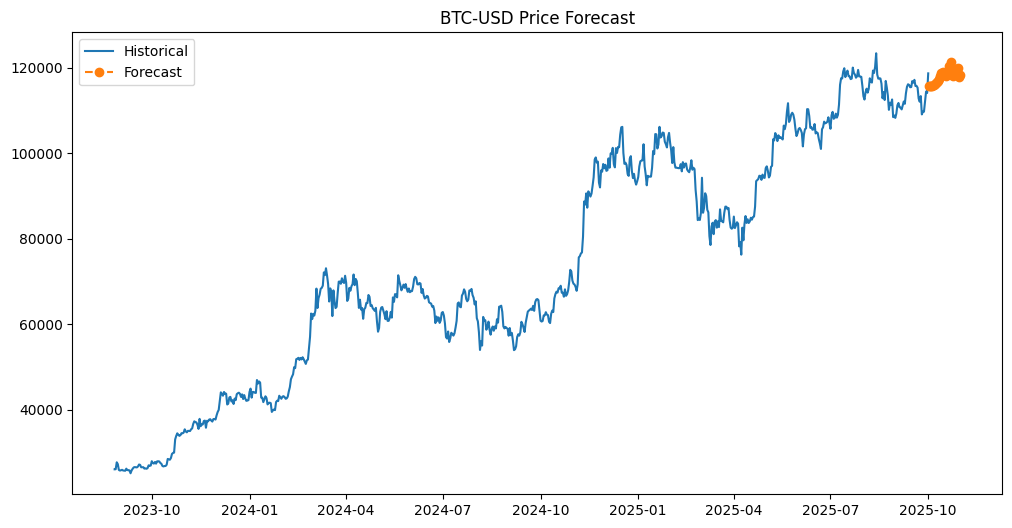

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up historical and forecast Series
historical = data.set_index('Date_')['Close_BTC-USD']
forecast_series = forecast['Close_BTC-USD']

# Concatenate using pd.concat
combined = pd.concat([historical, forecast_series])

plt.figure(figsize=(12,6))
plt.plot(historical, label="Historical")
plt.plot(forecast_series, label="Forecast", linestyle='--', marker='o')
plt.title("BTC-USD Price Forecast")
plt.legend()
plt.show()
